¡Hola Leandro! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripcipción del proyecto

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Leandro, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programandor ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran Data Scientist"
    
Ahora si yendo a esta notebook. Te quiero felicitar porque has resuelto todos los ejercicios de una gran forma, se nota tu gran capacidad para implementar las herramientas aprendidas, lo has hehco muy bien! Sin embargo, hubo 1 situación que amerita una pequeña corrección en el modelo constante, te he dejado un comentari rojos con el contexto necesario.

Éxitos y espero con ansias a nuestra próxima iteración para aprobar este proyecto!

Saludos Leandro!



<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Hola Leandro! Felicitaciones porque has corregido los detalles marcados en nuestra iteración anterior! Ahora si este proyecto está en total condiciones de ser aprobado, bien hecho!
    
Éxitos en tu camino dentro del mundo de los datos y saludos!

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

Se realizará la carga de las librerías necesarias para realizar el proyecto:

In [2]:
import math
from scipy import stats as st
import time
import random 

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

#Libreria para para procesamiento de texto:
import re
import spacy
import nltk
from nltk.corpus import stopwords

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

## Modelos de clasificacion
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Modelo de Arbol de decision
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from sklearn.svm import SVC

## Modelo lightGBM
from lightgbm import LGBMClassifier

# Libreria de CatBoostRegressor
from catboost import CatBoostClassifier

# Librería de XGBoost
import xgboost as xgb

import torch
import transformers

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina' ## Estaba comentado

plt.style.use('seaborn')

In [4]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente Leandro, un procedimiento de importación y de configuración excelente. Sigamos!

## Cargar datos

A continuación se realizará la importación de la base de datos:

In [5]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

Vamos a imprimir una muestra de los datos cargados para dar un vistazo general:

In [6]:
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


In [7]:
len(df_reviews['tconst'].unique())

6648

Realizando la impresión de datos se observa que el dataframe obtenido tiene 47331 filas de información y 17 columnas con características. No se puede detectar alguna anomalía con los datos u otro problema que requiera de atención. Vamos a explorar los datos con mayor profundidad:

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [9]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

Se tienen 17 columnas con características en las cuales se obtienen datos sobre las películas ademas de las reseñas. A primera viste se detecta que existe una pequeña cantidad de valores ausentes, en las columnas de 'average_rating' y 'votes'. Utilizando la función describe vamos a observar numéricamente como se encuentran algunas columnas:

In [10]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


NO se detectan valores anormales en las características numéricas de la base de datos. Por lo que continuaremos con nuestro análisis unicamente eliminando datos ausentes
 

In [11]:
df_reviews.dropna(how='any', inplace=True)
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     0
votes              0
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien la importación de nuestros datos y buenos métodos implemetados para la comprensión del dataframe. Excelente Leandro!

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

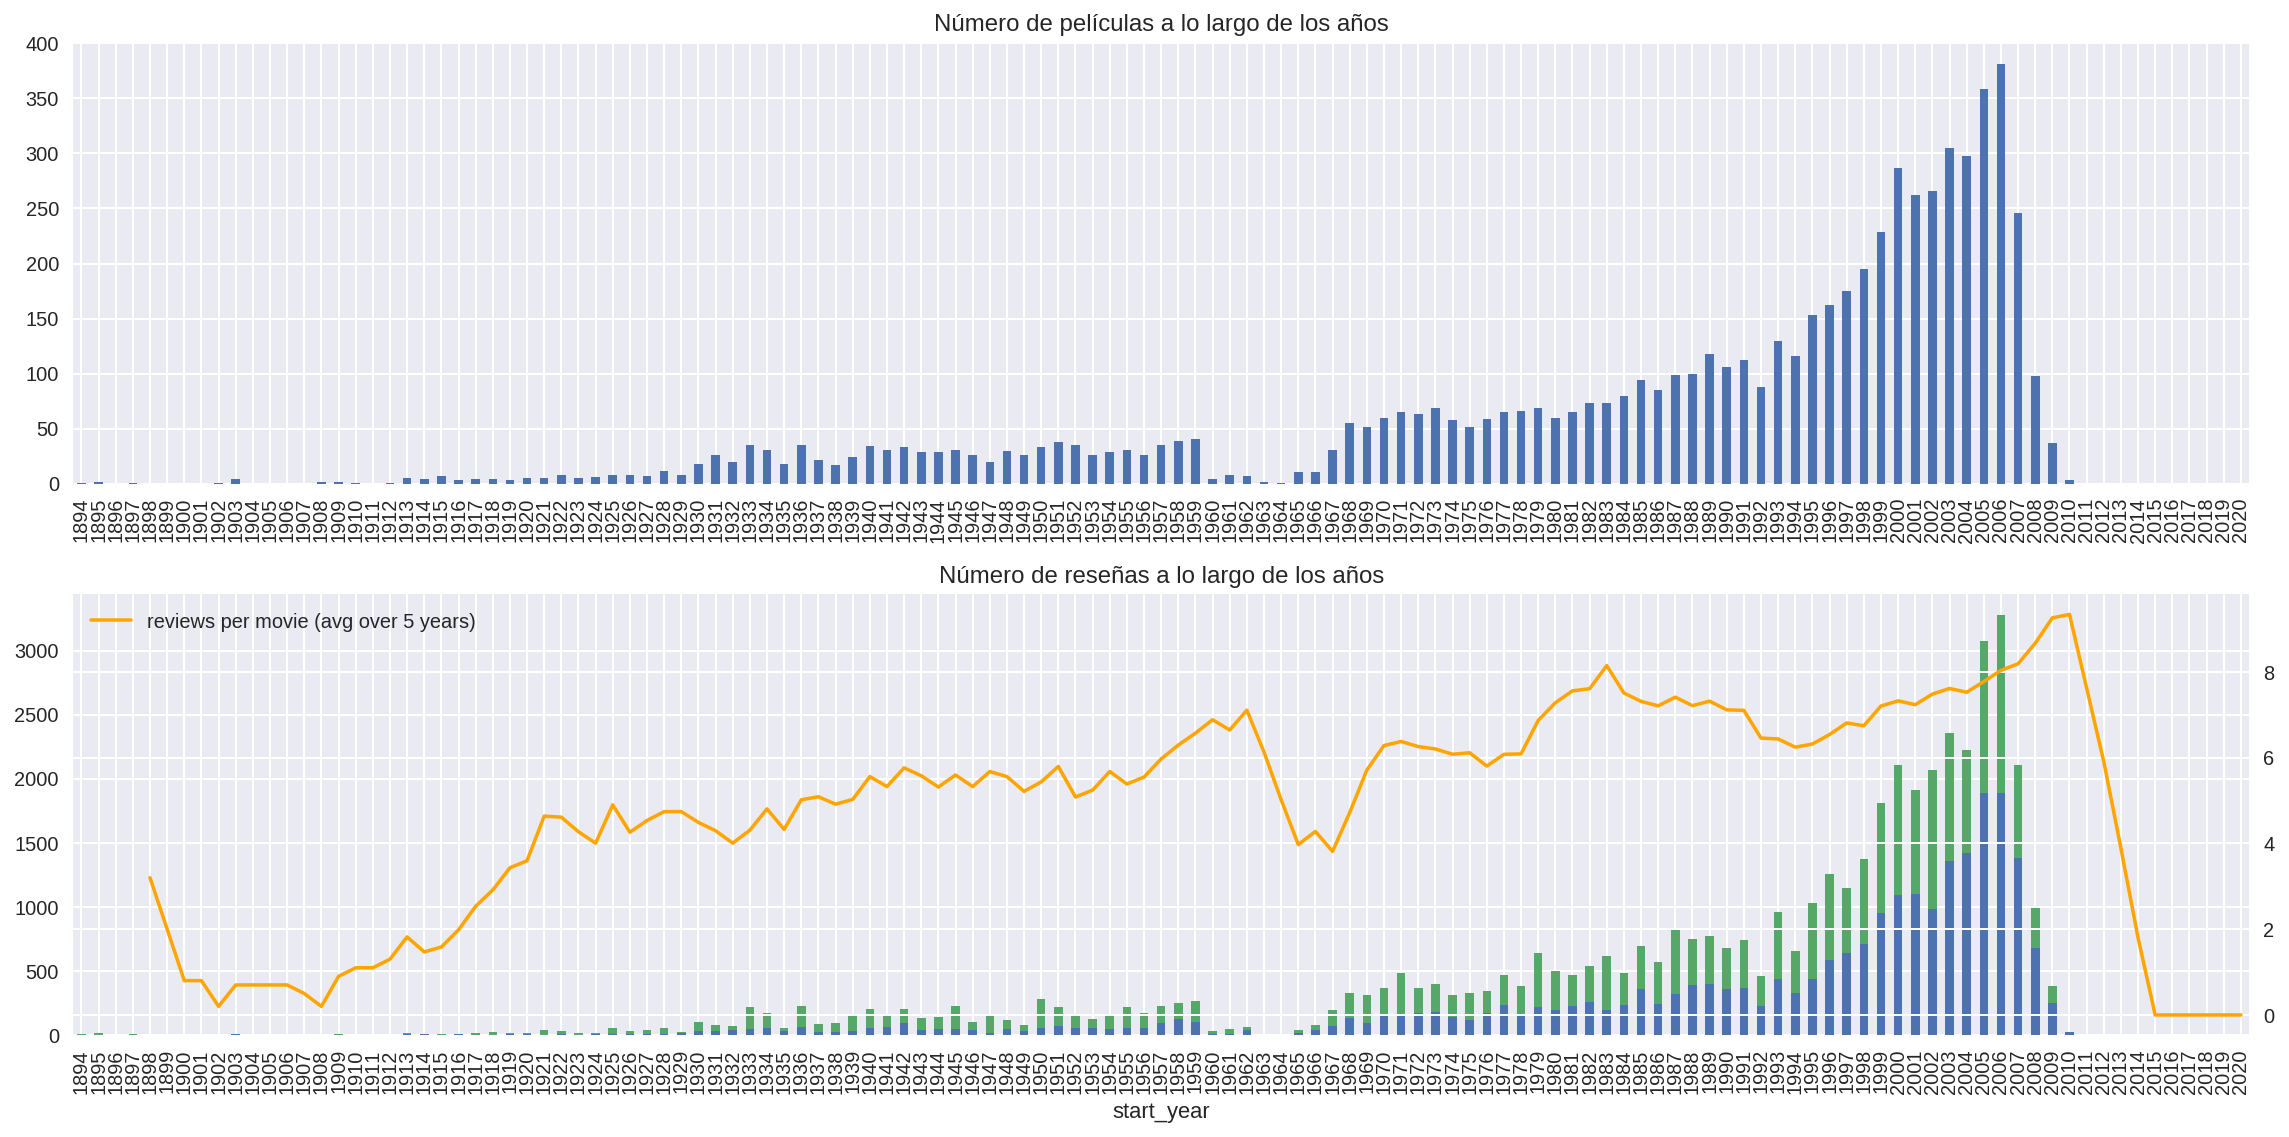

In [12]:
#Crea las figuras
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

#Para el primer subgráfico
ax = axs[0]

#Grafico de barras para la cantidad de películas para cada año
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

#Para el segundo subgráfico
ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Unas observaciones que nos permitirán comprender el trabajo que debemos realizar.

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

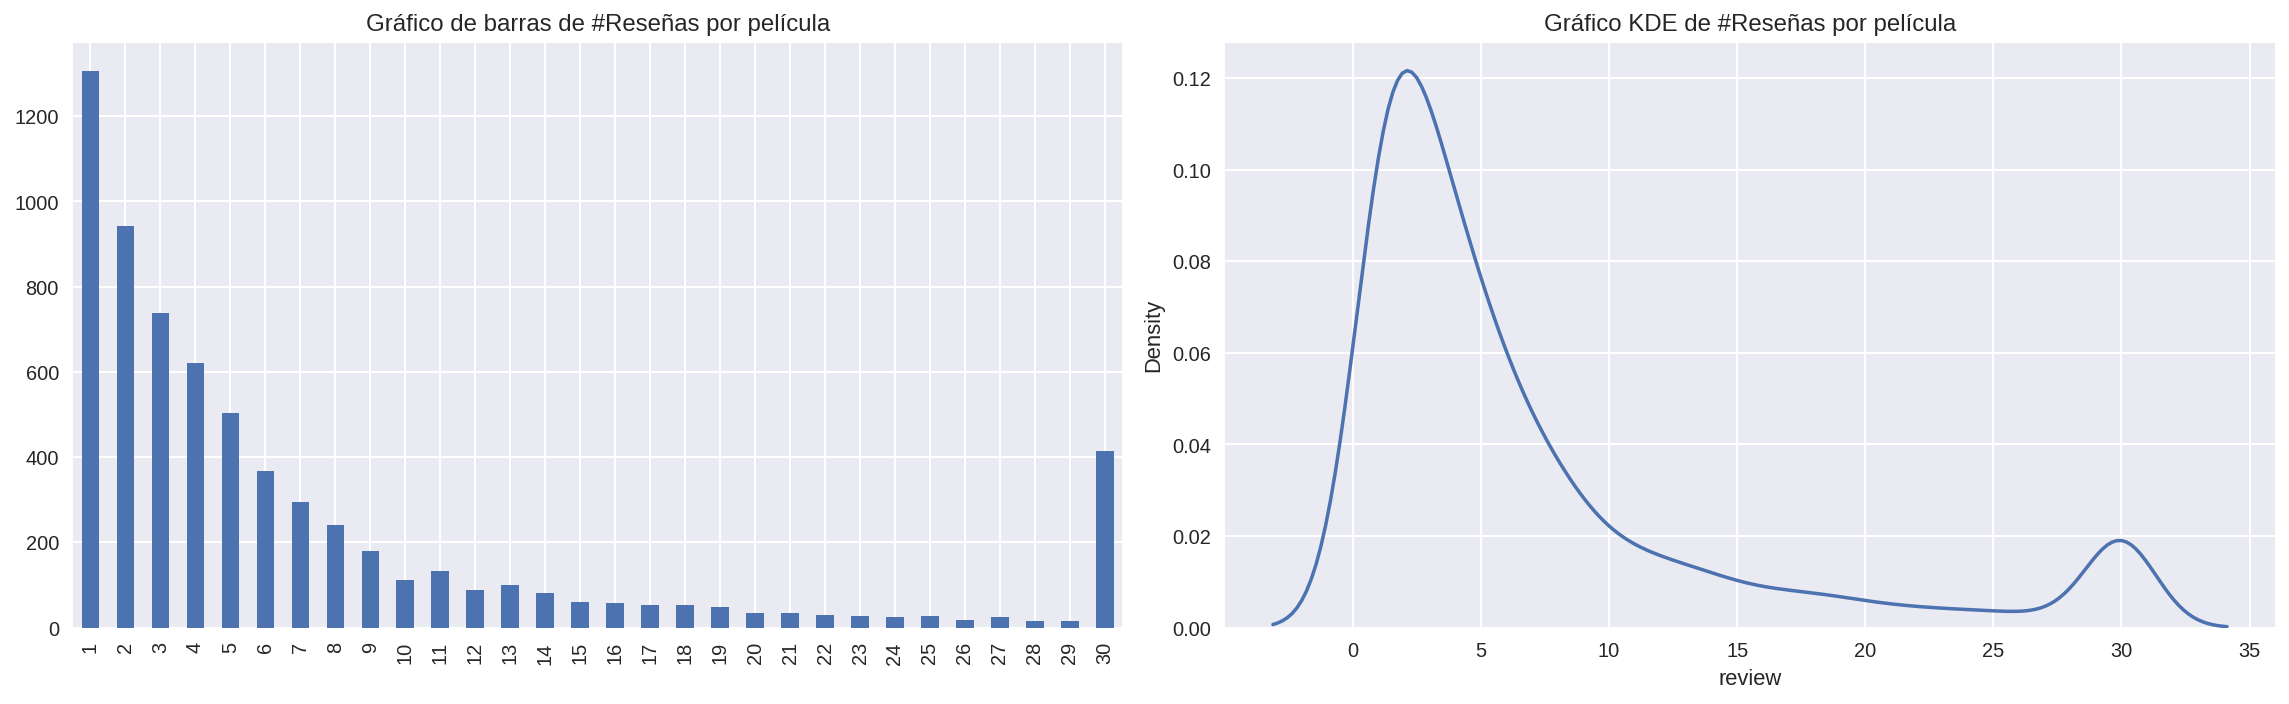

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

**Observaciones de los gráficos obtenidos**
- Se observa que la cantidad de reseñas obtenidas a lo largo de los años ha ido en aumento, siendo que en los primeros años la cantidad de reseñas es mínima y va aumentando hasta llegar a su máximo en el 2007.
- Para la distribución del número de reseñas por película se observa que en su mayoría las películas reciben pocas reseñas, entre 1 y 10 reseñas, son pocas las películas que superan más de 10 reseñas, sin embargo se observa un pico en 30, siendo que hay cerca de 400 películas que recibieron 30 reseñas.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente excelente! Continuamos el proceso de comprensión de los datos y del problema, a la vez muy bien tus conclusiones. Excelente!

### Análisis de desequilibrio de clases

Se va a observar la diferencia que existe entre reseñas positivas y negativas en la base de datos:

In [14]:
clases = df_reviews['pos'].value_counts()
clases

0    23715
1    23614
Name: pos, dtype: int64

Text(0.5, 1.0, 'Recuento de reviews positivas y negativas')

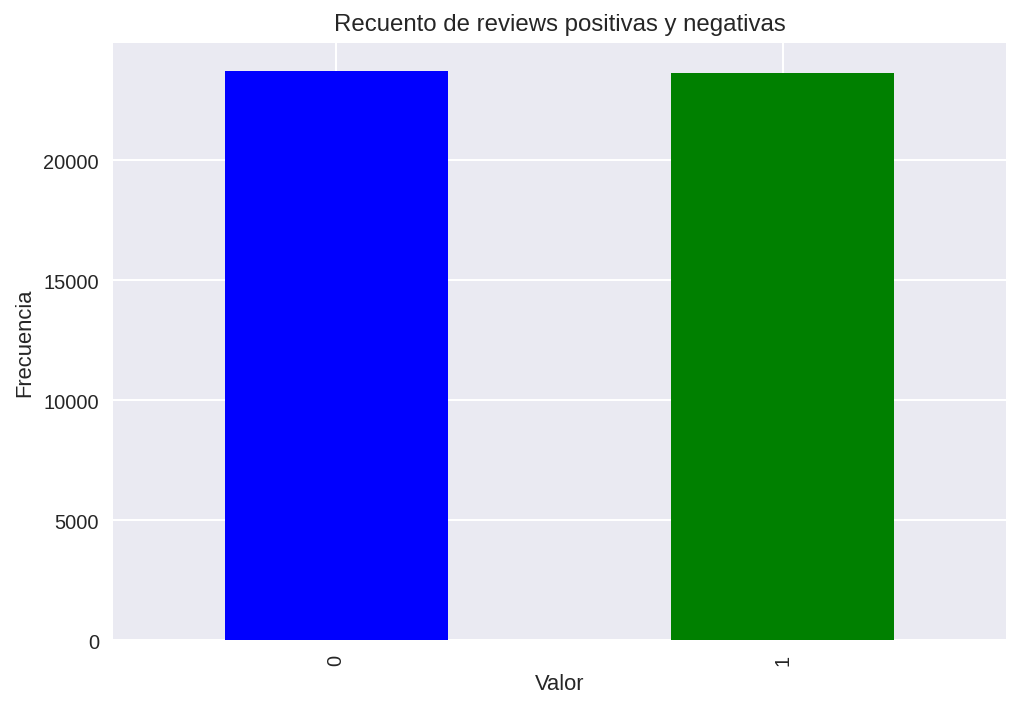

In [15]:
clases.plot(kind='bar', color=['blue','green'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Recuento de reviews positivas y negativas')

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente observación del balanceo!

Se observa que existe casi la misma cantidad de reseñas positivas y negativas, por lo que el desequilibrio de clases no va a ser un problema para el análisis.

A continuacion se va a analizar como se encuentran distruibuidas las calificaciones de todas las peliculas en una escala del 1 al 10:

In [16]:
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft

1     4863
2     2155
3     2317
4     2577
7     2393
8     2876
9     2153
10    4462
Name: rating, dtype: int64

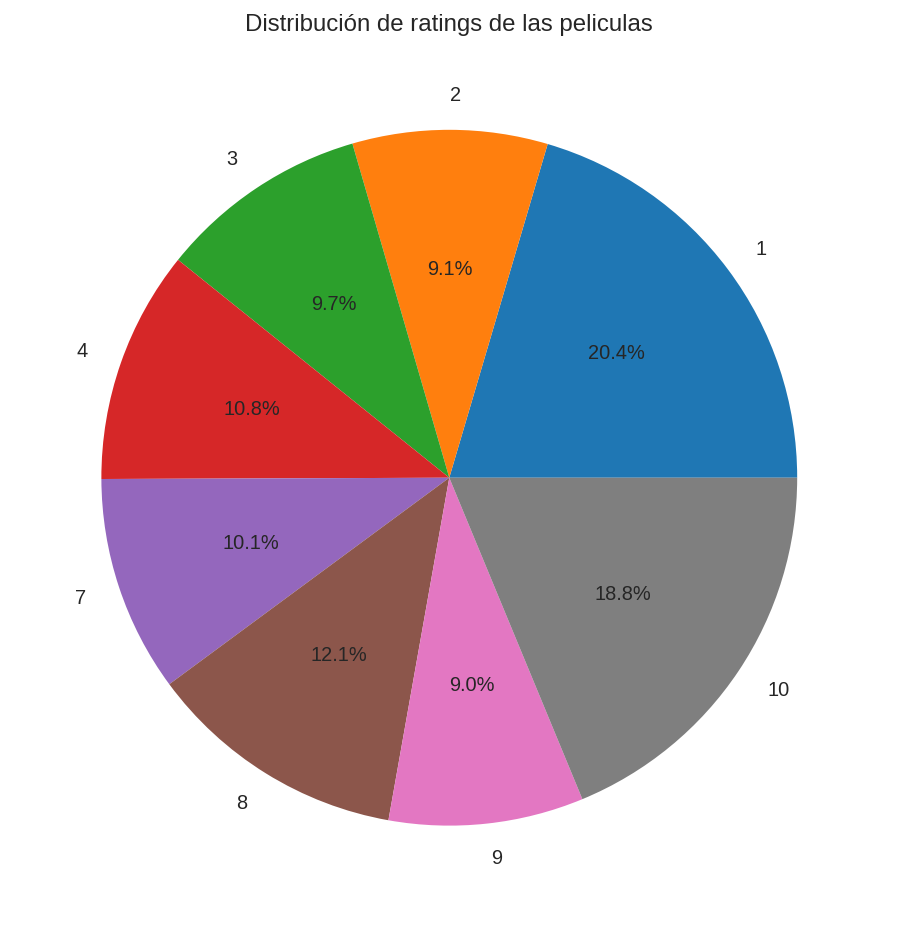

In [17]:
plt.figure(figsize=(8,8))
valores = dft.index
recuentos = dft.values
# Colores para las el grafico
colores = plt.cm.tab10.colors

plt.pie(recuentos, labels=valores, autopct='%1.1f%%', colors=colores)
plt.title('Distribución de ratings de las peliculas')

# Mostrar el gráfico
plt.show()


Ahora analizaremos como se distribuyen las puntuaciones en las películas de la base de datos entre el conjunto de prueba y el conjunto de entrenamiento:

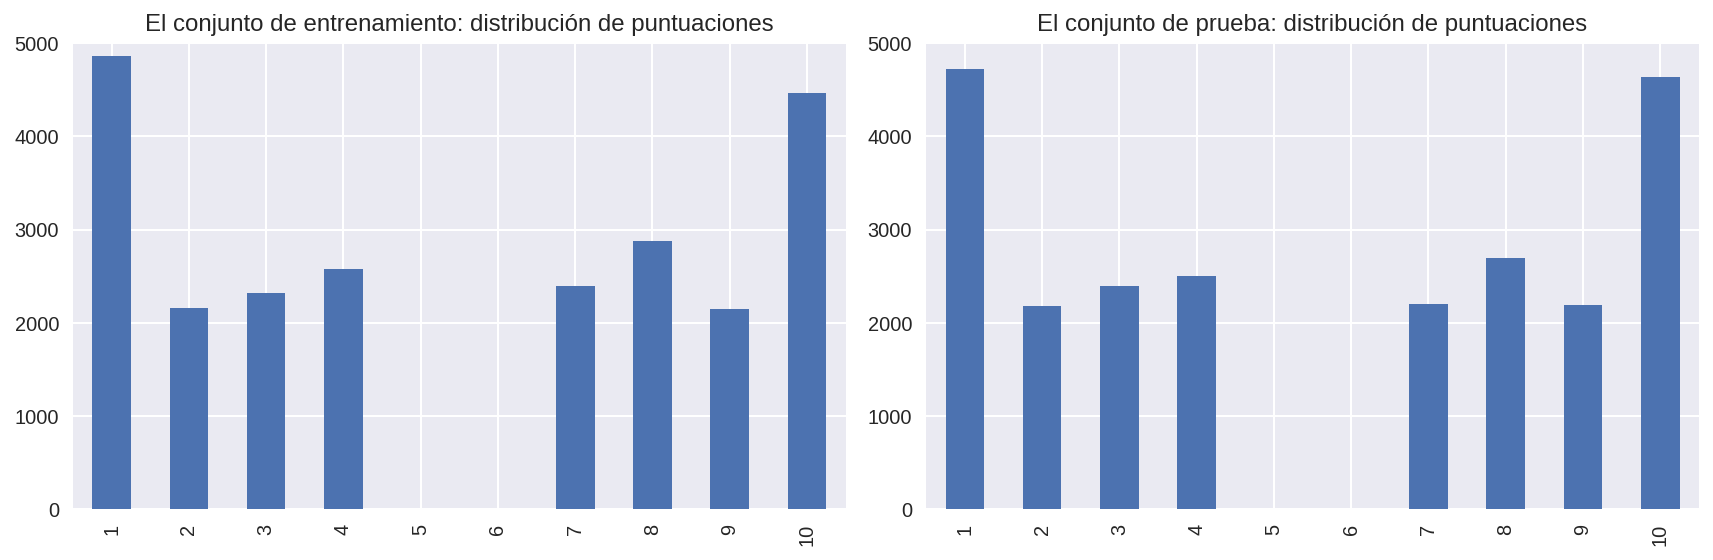

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))      

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Entre el conjunto de prueba y el conjunto de entrenamiento se observan que las puntuaciones tienen patrones muy similares. Por razones desconocidsa no se tienen películas que tengan calificaciones de 5 o 6. 

A continuación se analizará la distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


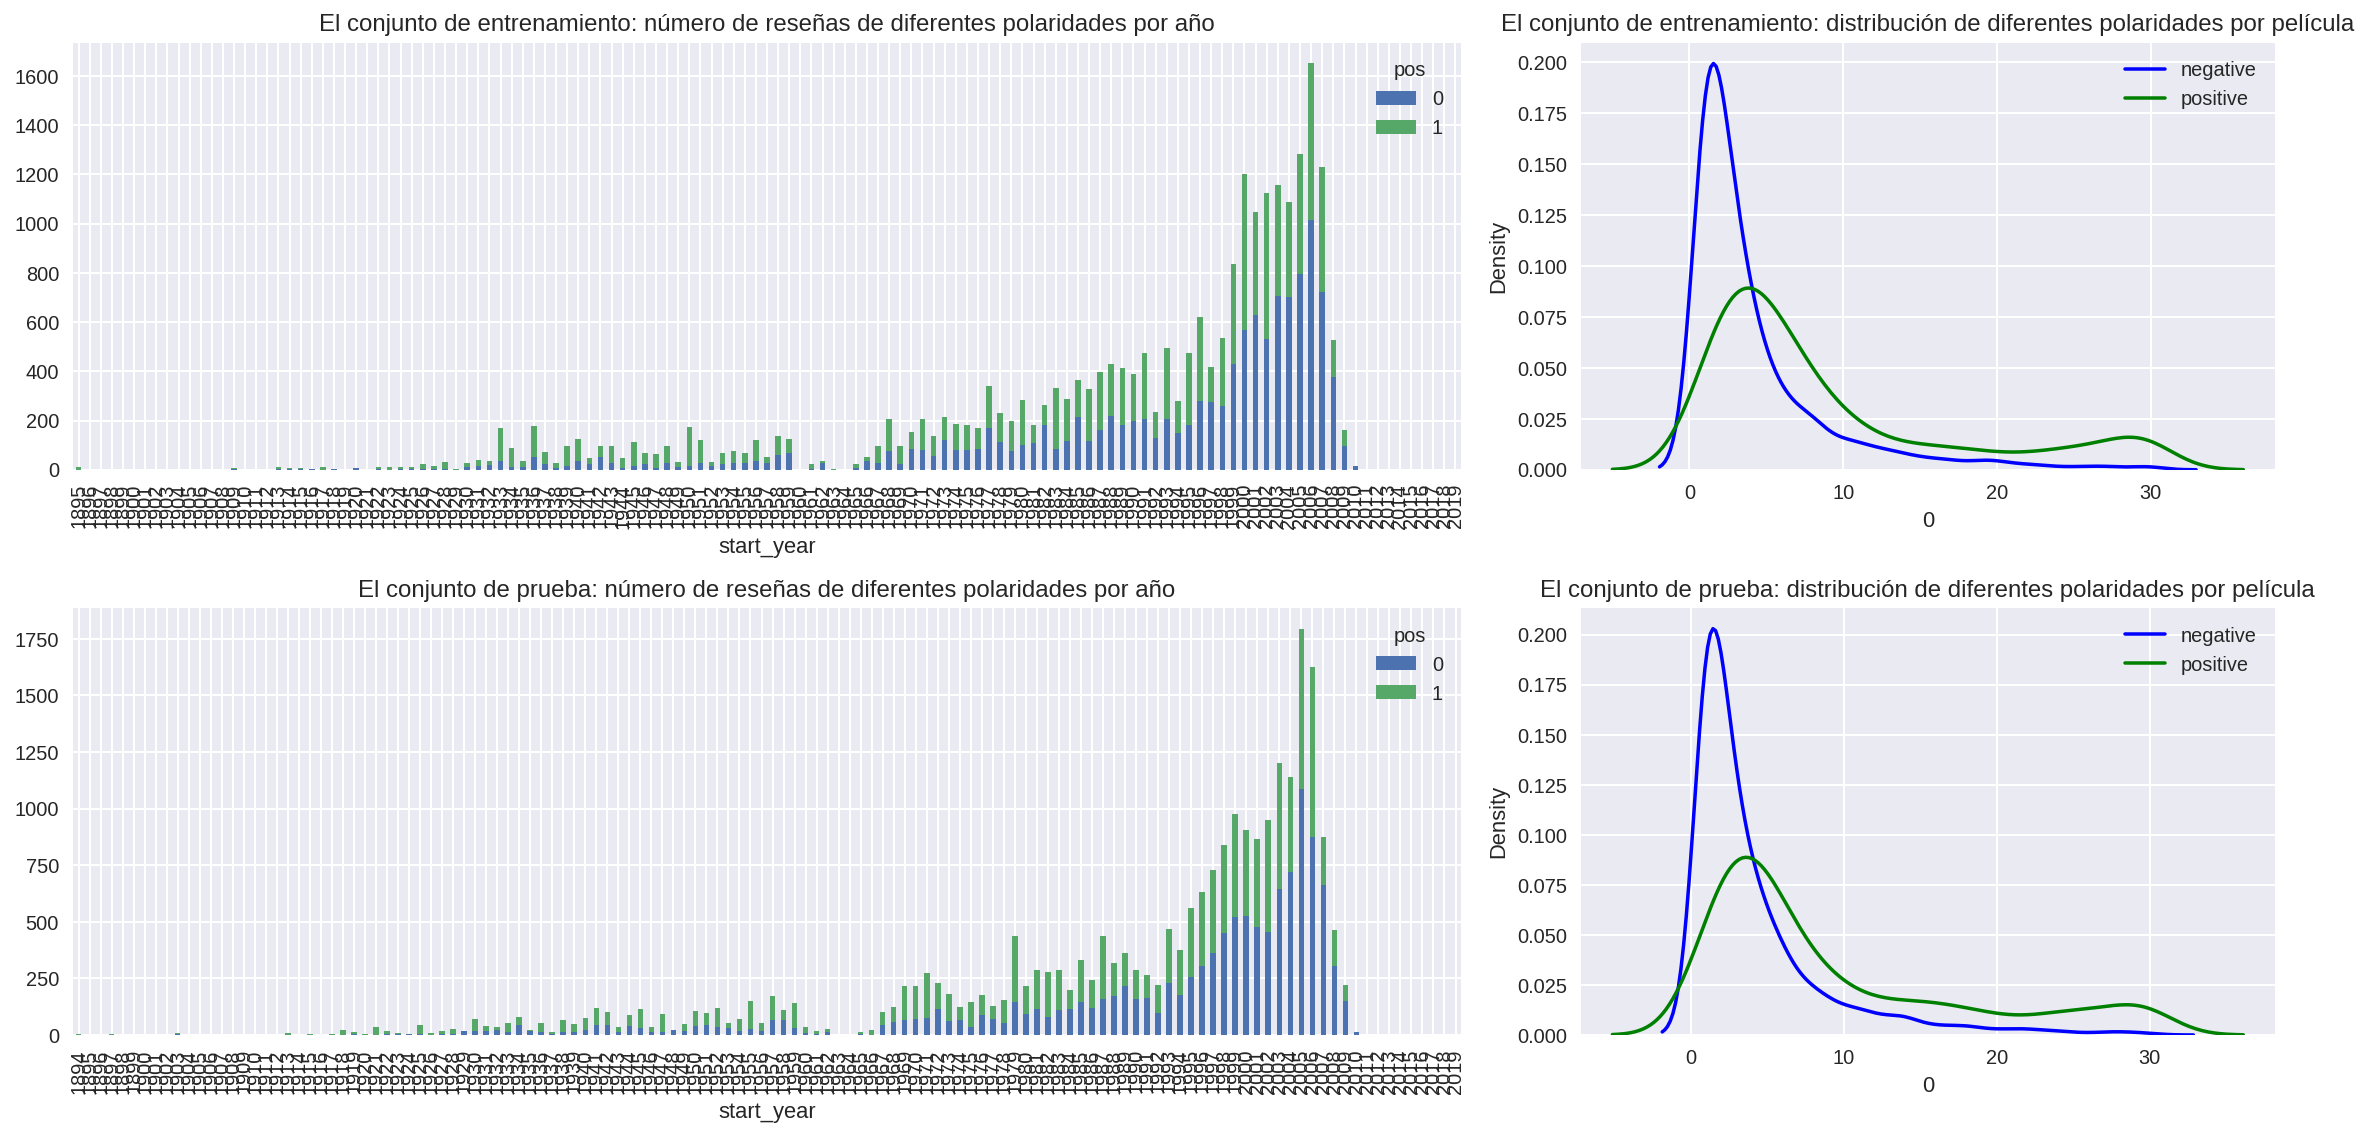

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Con estos gráficos se corrobora que existe muy poca diferencia entre los datos de entrenamiento y los datos de prueba.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente muy bien hecho Leandro, excelente proceso de expliración sobre los datos. Te agradezco por el compromiso con el agregado de los gráficos.

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [20]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
        
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

In [21]:
def evaluate_model1(preds_train, target_train, preds_test, target_test, model_name=""):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 4))

    fig.suptitle(f"Model: {model_name} Evaluation")

    for type, preds, target in (('train', preds_train, target_train), ('test', preds_test, target_test)):

        eval_stats[type] = {}

        pred_target = preds > 0.5
        pred_proba = preds

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [22]:
#Funcion para normalizar texto:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-Z\']', ' ', text)
    clean_text = " ".join(clean_text.split())

    return clean_text.lower()

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(text):
    doc = nlp(text.lower())
    
    lemmas=[]
    for token in doc:
        lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
### para normalizar las reseñas:
def procesar_texto(texto):
    return lemmatize(clear_text(texto))

In [ ]:


# Aplica la función procesar_texto a la columna 'review' usando progress_apply en lugar de apply
df_reviews['review_norm'] = df_reviews['review'].progress_apply(procesar_texto)

# Muestra el DataFrame resultante
print(df_reviews)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien hecho Leandro! Un procedimiento de normalización correcto tras crear la función y aplicarla a las columnas correspondientes en nuestro dataframe.

In [ ]:
#df_reviews.to_csv('reviews_norm.csv', index=False)

In [23]:
########### Datos guardados para no volver a normalizar 
df_lematizado = pd.read_csv('reviews_norm.csv')
df_lematizado
df_reviews = df_lematizado

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [24]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)


(23796, 18)
(23533, 18)


In [25]:
print(train_target.shape)
print(test_target.shape)

(23796,)
(23533,)


Dado que vamos a realizar el analisis de las reseñas, no necesitamos todas las características que nos entrega la base de datos, por lo que vamos a seleccionar solo los las reseñas recientemente normalizadas       

In [26]:
df_reviews_train

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,review_norm
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335,the pakage imply that warren beatty and goldie...
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336,how the hell do they get this make present its...
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903,this true story of carlson 's raider be more o...
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905,should have be title ' balderdash ' little in ...
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904,the movie ' gung ho ' the story of carlson 's ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47251,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,O my gosh... Just give me a minute to breath. ...,10,pos,1,train,407,o my gosh just give I a minute to breath this ...
47252,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,I can't tell you all how much I love this movi...,10,pos,1,train,408,I can not tell you all how much I love this mo...
47253,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,Legend of Zu is possibly the most exciting mov...,10,pos,1,train,409,legend of zu be possibly the most exciting mov...
47254,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,This movie is well done on so many levels that...,10,pos,1,train,411,this movie be well do on so many level that I ...


In [27]:
## Reviews sin normalizar
train_corpus1 = df_reviews_train['review']
test_corpus1= df_reviews_test['review']

## Reviews normalizados
train_corpus2 = df_reviews_train['review_norm']
test_corpus2 = df_reviews_test['review_norm']

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Partimos los datos en los conjuntos de entrenamiento y testeo. Bien! Sigamos!

In [28]:
train_corpus1

0        The pakage implies that Warren Beatty and Gold...
1        How the hell did they get this made?! Presenti...
7        This true story of Carlson's Raiders is more o...
8        Should have been titled 'Balderdash!' Little i...
9        The movie 'Gung Ho!': The Story of Carlson's M...
                               ...                        
47251    O my gosh... Just give me a minute to breath. ...
47252    I can't tell you all how much I love this movi...
47253    Legend of Zu is possibly the most exciting mov...
47254    This movie is well done on so many levels that...
47255    As a history nut who is particularly intereste...
Name: review, Length: 23796, dtype: object

In [29]:
test_corpus1

2        There is no real story the film seems more lik...
3        Um .... a serious film about troubled teens in...
4        I'm totally agree with GarryJohal from Singapo...
5        This is the first movie I've seen from Singapo...
6        Yes non-Singaporean's can't see what's the big...
                               ...                        
47324    This is another of my favorite Columbos. It sp...
47325    Talk about being boring! I got this expecting ...
47326    I never thought I'd say this about a biopic, b...
47327    Spirit and Chaos is an artistic biopic of Miya...
47328    I'll make this brief. This was a joy to watch....
Name: review, Length: 23533, dtype: object

In [30]:
train_corpus2

0        the pakage imply that warren beatty and goldie...
1        how the hell do they get this make present its...
7        this true story of carlson 's raider be more o...
8        should have be title ' balderdash ' little in ...
9        the movie ' gung ho ' the story of carlson 's ...
                               ...                        
47251    o my gosh just give I a minute to breath this ...
47252    I can not tell you all how much I love this mo...
47253    legend of zu be possibly the most exciting mov...
47254    this movie be well do on so many level that I ...
47255    as a history nut who be particularly intereste...
Name: review_norm, Length: 23796, dtype: object

In [31]:
test_corpus2

2        there be no real story the film seem more like...
3        um a serious film about troubled teen in singa...
4        I be totally agree with garryjohal from singap...
5        this be the first movie I 've see from singapo...
6        yes non singaporean 's can not see what be the...
                               ...                        
47324    this be another of my favorite columbo it spor...
47325    talk about be bore I get this expect a fascina...
47326    I never think I would say this about a biopic ...
47327    spirit and chaos be an artistic biopic of miya...
47328    I 'll make this brief this be a joy to watch i...
Name: review_norm, Length: 23533, dtype: object

A contunuación vamos a utilizar la función TFidVectorizer para la vectorización de los textos, vamos a usar NLP y NTLK:

In [32]:

%%time
### Para NTLK sin normalizacion

tf_idf1 = TfidfVectorizer(stop_words="english", lowercase=True)
train_tf_idf1 = tf_idf1.fit_transform(train_corpus1)
test_tf_idf1 = tf_idf1.transform(test_corpus1)

CPU times: user 9.84 s, sys: 63.3 ms, total: 9.91 s
Wall time: 9.93 s


In [33]:
%%time
## Con NLP, normalizado

tf_idf2 = TfidfVectorizer(stop_words="english", lowercase=True)
train_tf_idf2 = tf_idf2.fit_transform(train_corpus2)
test_tf_idf2 = tf_idf2.transform(test_corpus2)

CPU times: user 9.35 s, sys: 36.7 ms, total: 9.39 s
Wall time: 9.42 s


In [34]:
train_tf_idf1.shape

(23796, 72915)

In [35]:
test_tf_idf1.shape

(23533, 72915)

In [36]:
train_tf_idf2.shape

(23796, 58977)

In [37]:
test_tf_idf2.shape

(23533, 58977)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de vecotres!

## Trabajar con modelos

### Modelo 0 - Constante

In [40]:
modelo_dummy = DummyClassifier(strategy='constant', constant=1, random_state=42)

# Entrenar el modelo
modelo_dummy.fit(train_tf_idf1, train_target)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_dummy.predict(test_tf_idf1) 

In [41]:
# Calcular la exactitud (accuracy) del modelo
exactitud = accuracy_score(test_target, predicciones)
print("Exactitud del modelo dummy:", exactitud)

Exactitud del modelo dummy: 0.4984489865295542


In [42]:
### Valor de f1:
f1_score(test_target, predicciones)

0.6652865609846014

In [43]:
recall_score(test_target, predicciones)

1.0

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


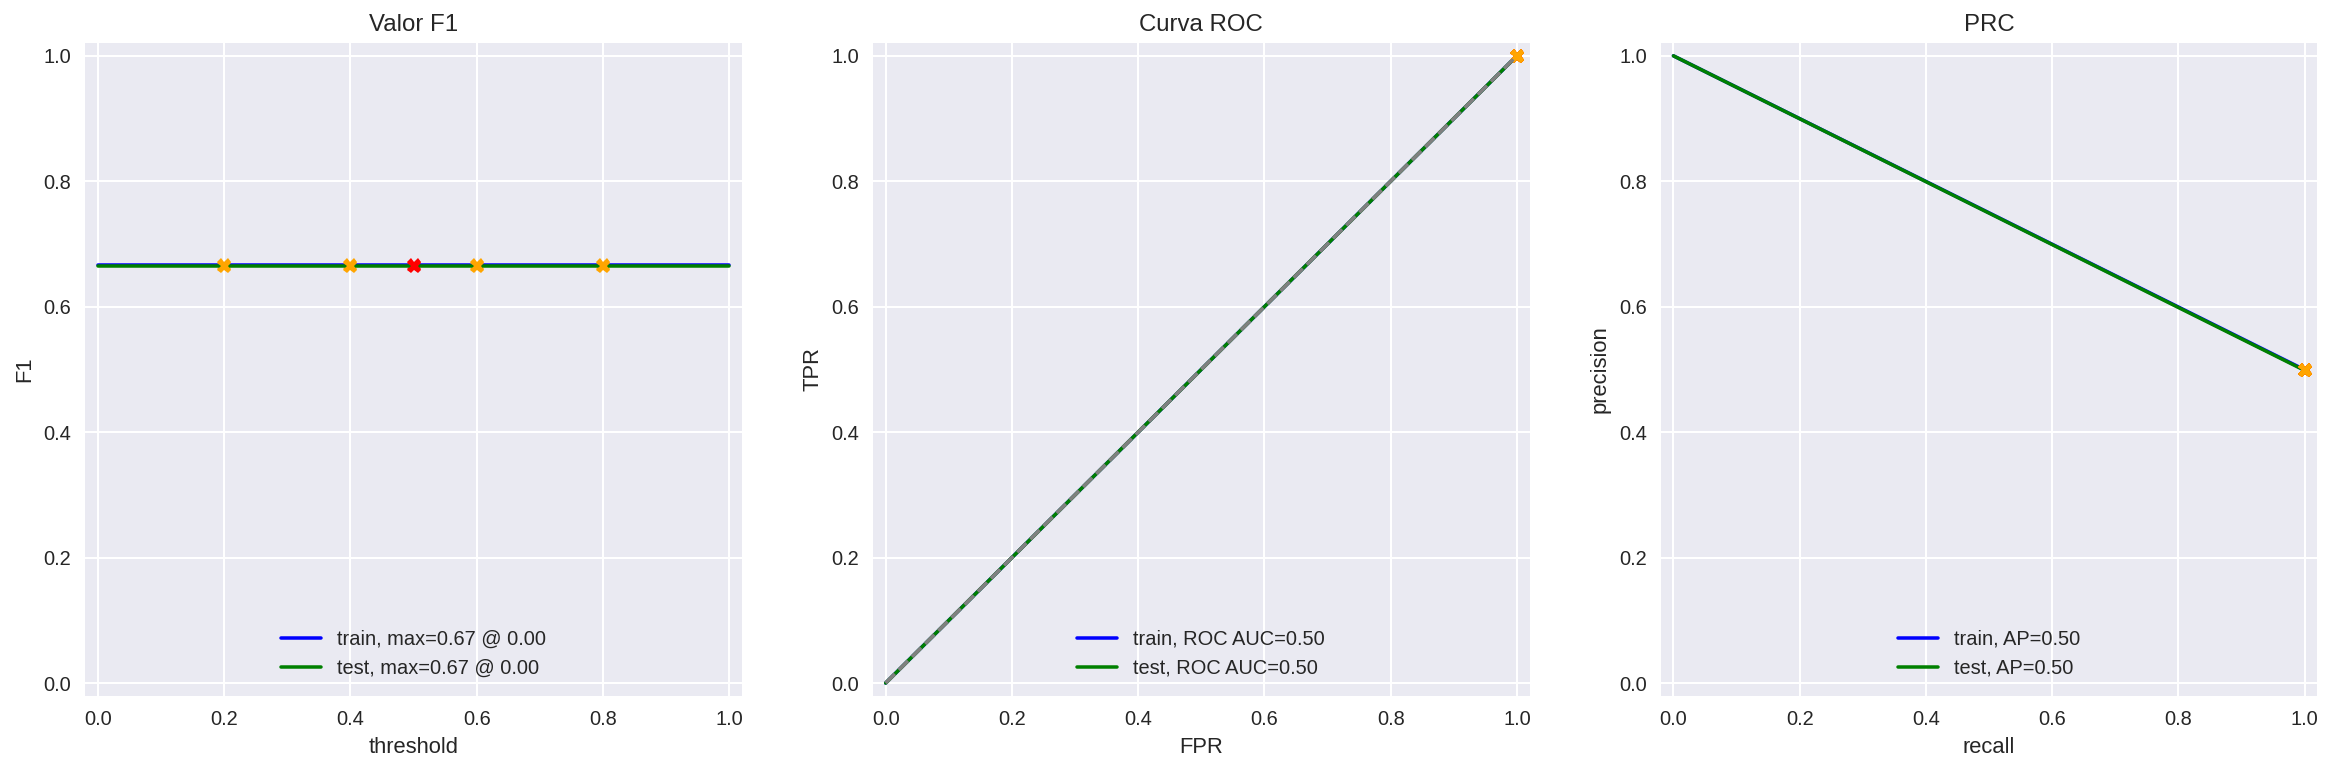

In [44]:
evaluate_model(modelo_dummy, train_tf_idf1, train_target, test_tf_idf1, test_target)

Con esto observamos que nuestro modelo acierta aproximadamente el 50% de las veces, dado que, durante el análisis de desequilibrio de clases se observo que los datos donde el valor 'pos' es 1 casi el 50% de las veces, la exactitud del modelo es lo esperado. 

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien hecho Leandro, el procedimiento es correcto sin embargo estamos pasando por alto un detalle importante. Recuerda que debe ser el modelo constante, es decir que el parámetro **strategy** debería tener otro valor. A su vez esto nos implicaría agregar el parametro **constant=1**

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 2)</b> <a class="tocSkip"></a>

Excelente corrección Leandro, bien hecho!

<div class="alert alert-block alert-info">
<b>Se añadio: strategy='constant', constant=1 al modelo dummy.</b> <a class="tocSkip"></a>
</div>

### Modelo 1 - NLTK, TF-IDF y Arbol de decision

TF-IDF

In [49]:
## Entrenando modelo de regresion logística:
random_state = 200
model_1 = DecisionTreeClassifier(random_state=random_state)
model_1.fit(train_tf_idf1, train_target)
model1_predict = model_1.predict(test_tf_idf1)

In [50]:
accuracy_score(test_target, model1_predict)

0.7122763778523775

In [51]:
f1_score(test_target, model1_predict)

0.7095113475481573

In [52]:
recall_score(test_target, model1_predict)

0.7049445865302643

In [53]:
result = mean_squared_error(test_target, model1_predict)**0.5
result    

0.5363987529325758

          train  test
Accuracy    1.0  0.71
F1          1.0  0.71
APS         1.0  0.65
ROC AUC     1.0  0.71
CPU times: user 904 ms, sys: 4.17 ms, total: 908 ms
Wall time: 967 ms


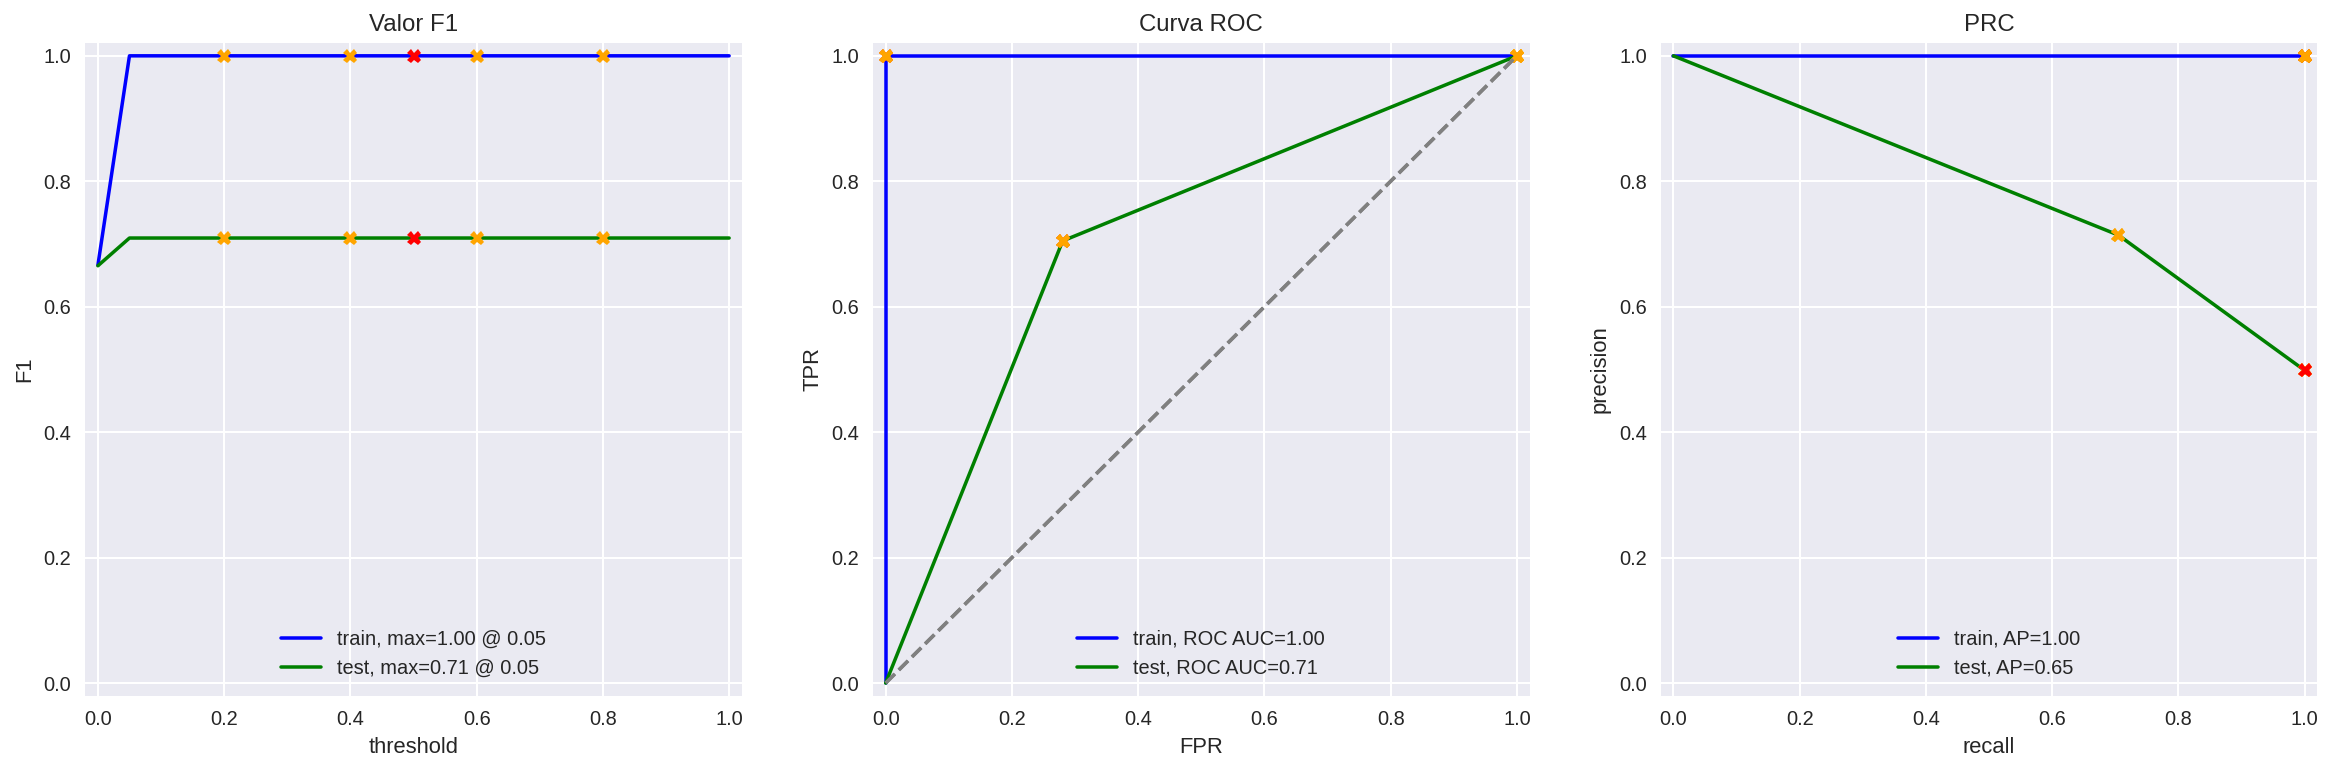

In [54]:
%%time
evaluate_model(model_1, train_tf_idf1, train_target, test_tf_idf1, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente implementación del proceso, tal como debíamos realizarlo. Sin embargo podemos ver que hay una gran diferencia entre los dos conjuntos que testeamos, es decir que podemos estar entrando en un proceso de overfitting donde el modelo sobre aprende en el entrenamiento pero no generaliza de la misma manera en la realidad (conjunto test). Algo que valdría la pena investigar en profundidad.

### Modelo 2 - spaCy, TF-IDF y Arbol de decision

In [57]:
## Entrenando modelo de regresion logística:
model_2 = DecisionTreeClassifier(random_state=random_state)
model_2.fit(train_tf_idf2, train_target)
model2_predict = model_2.predict(test_tf_idf2)

          train  test
Accuracy    1.0  0.71
F1          1.0  0.71
APS         1.0  0.65
ROC AUC     1.0  0.71
CPU times: user 665 ms, sys: 4.1 ms, total: 669 ms
Wall time: 682 ms


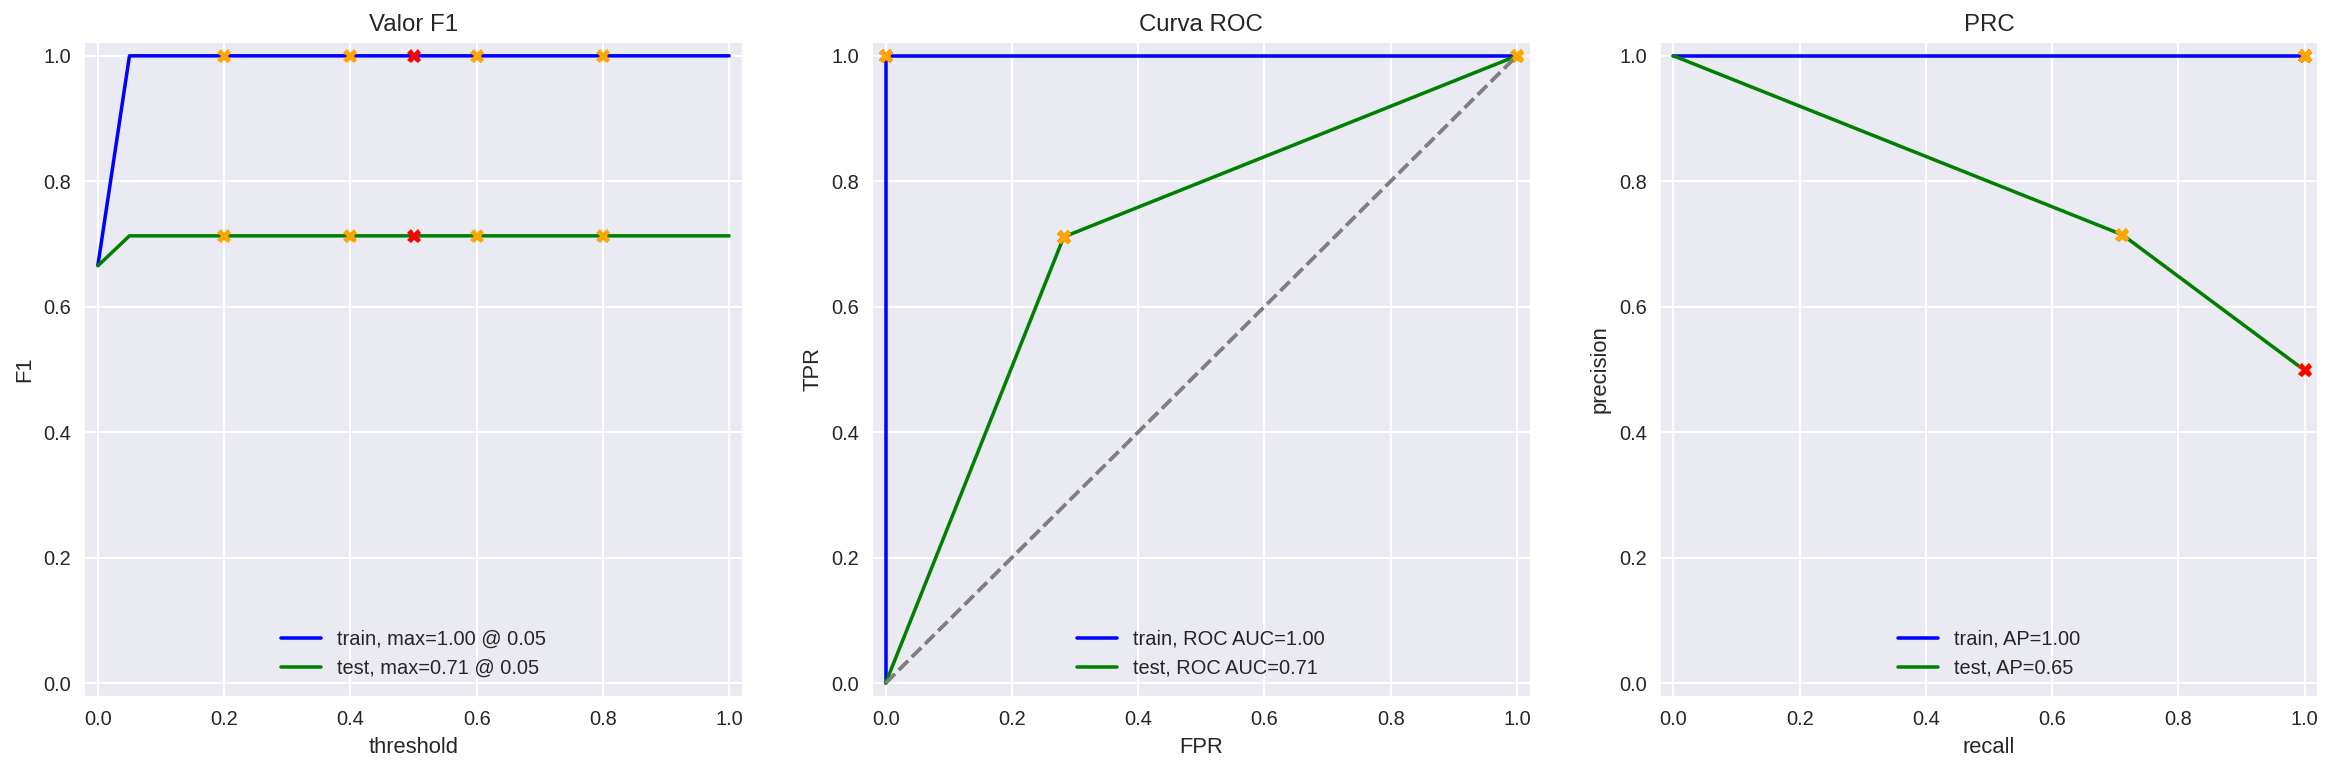

In [58]:
%%time
evaluate_model(model_2, train_tf_idf2, train_target, test_tf_idf2, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente bien hecho Leandro! Un proceso correcto!

### Modelo 3 - NLTK, TF-IDF y RandomForest

Accuracy del mejor modelo en el conjunto de validación (n_estimators = 13): 0.7840479326902647
          train  test
Accuracy    1.0  0.78
F1          1.0  0.78
APS         1.0  0.83
ROC AUC     1.0  0.86
CPU times: user 1min 21s, sys: 21.2 ms, total: 1min 21s
Wall time: 1min 21s


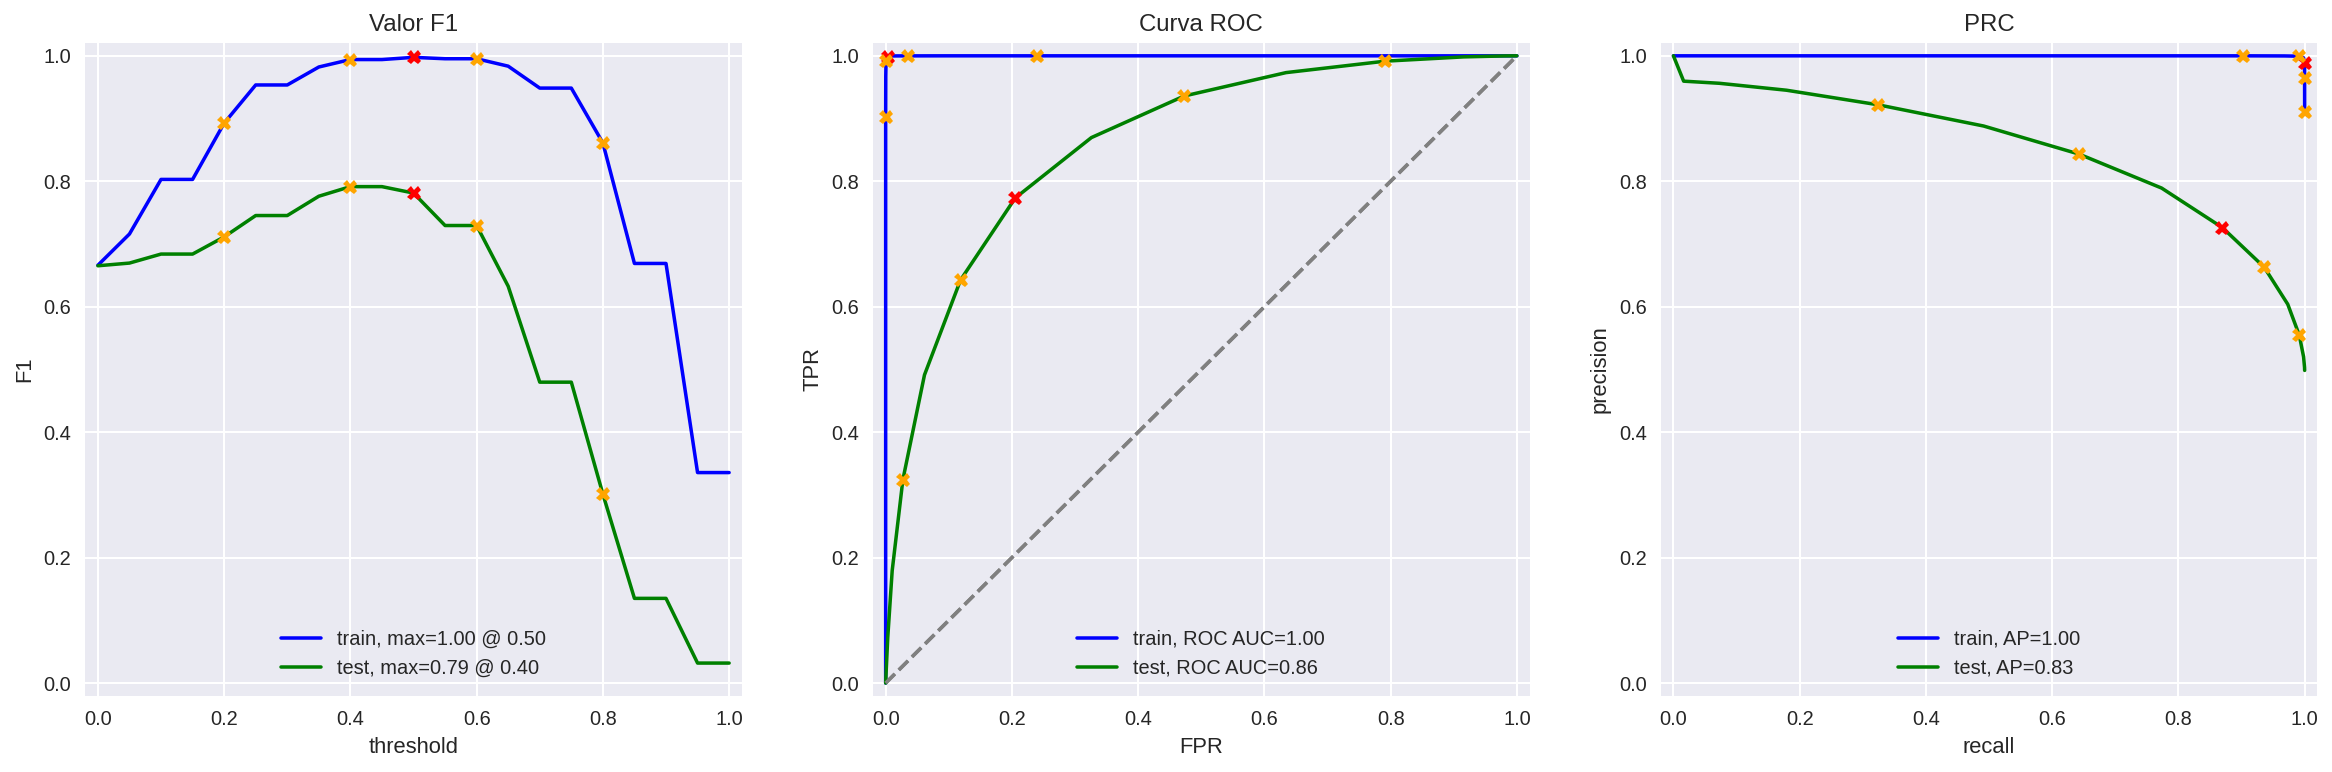

In [59]:
%%time
best_score = 0
best_est = 0

for est in range (1,15):
    modelRF = RandomForestClassifier(random_state = 12345, n_estimators = est)
    modelRF.fit(train_tf_idf1, train_target)
    score = modelRF.score(test_tf_idf1, test_target)
    
    if score > best_score:
        best_score = score
        best_est = est
        
print(f'Accuracy del mejor modelo en el conjunto de validación (n_estimators = {best_est}): {best_score}')

model_3 = RandomForestClassifier(random_state = 12345, n_estimators = best_est) # Entrenando con el mejor valor de n_estimators
model_3.fit(train_tf_idf1, train_target)
evaluate_model(model_3, train_tf_idf1, train_target, test_tf_idf1, test_target)


### Modelo 4 - spaCy, TF-IDF y RandomForest

          train  test
Accuracy    1.0  0.78
F1          1.0  0.78
APS         1.0  0.83
ROC AUC     1.0  0.86


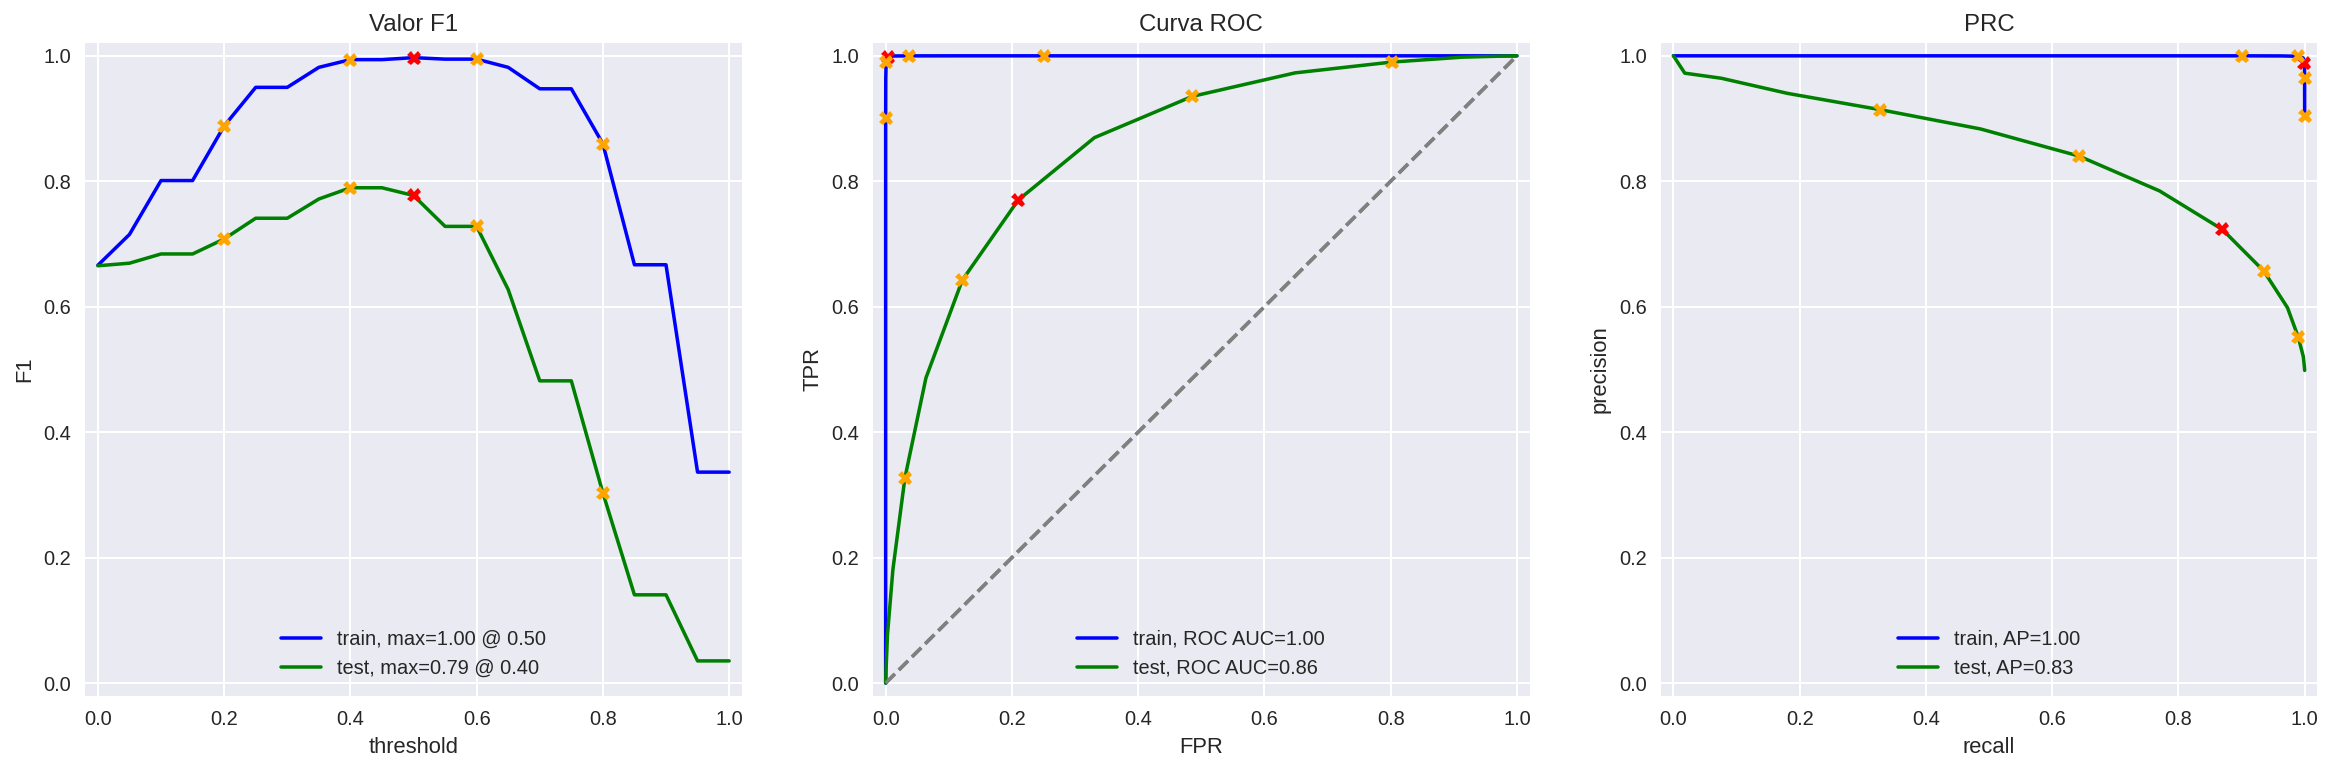

In [60]:
model_4 = RandomForestClassifier(random_state = 54321, n_estimators = best_est) # Entrenando con el mejor valor de n_estimators
model_4.fit(train_tf_idf2, train_target)
evaluate_model(model_4, train_tf_idf2, train_target, test_tf_idf2, test_target)


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente una correcta imeplementación! Aquí podemos notar que esta brecha de diferencia disminuyo con Random Forest, felicitaciones!

### Modelo 5 - NTLK, TF-IDF y LGBMClassifier


          train  test
Accuracy   0.92  0.84
F1         0.92  0.84
APS        0.98  0.92
ROC AUC    0.98  0.92
CPU times: user 56.3 s, sys: 636 ms, total: 56.9 s
Wall time: 57.1 s


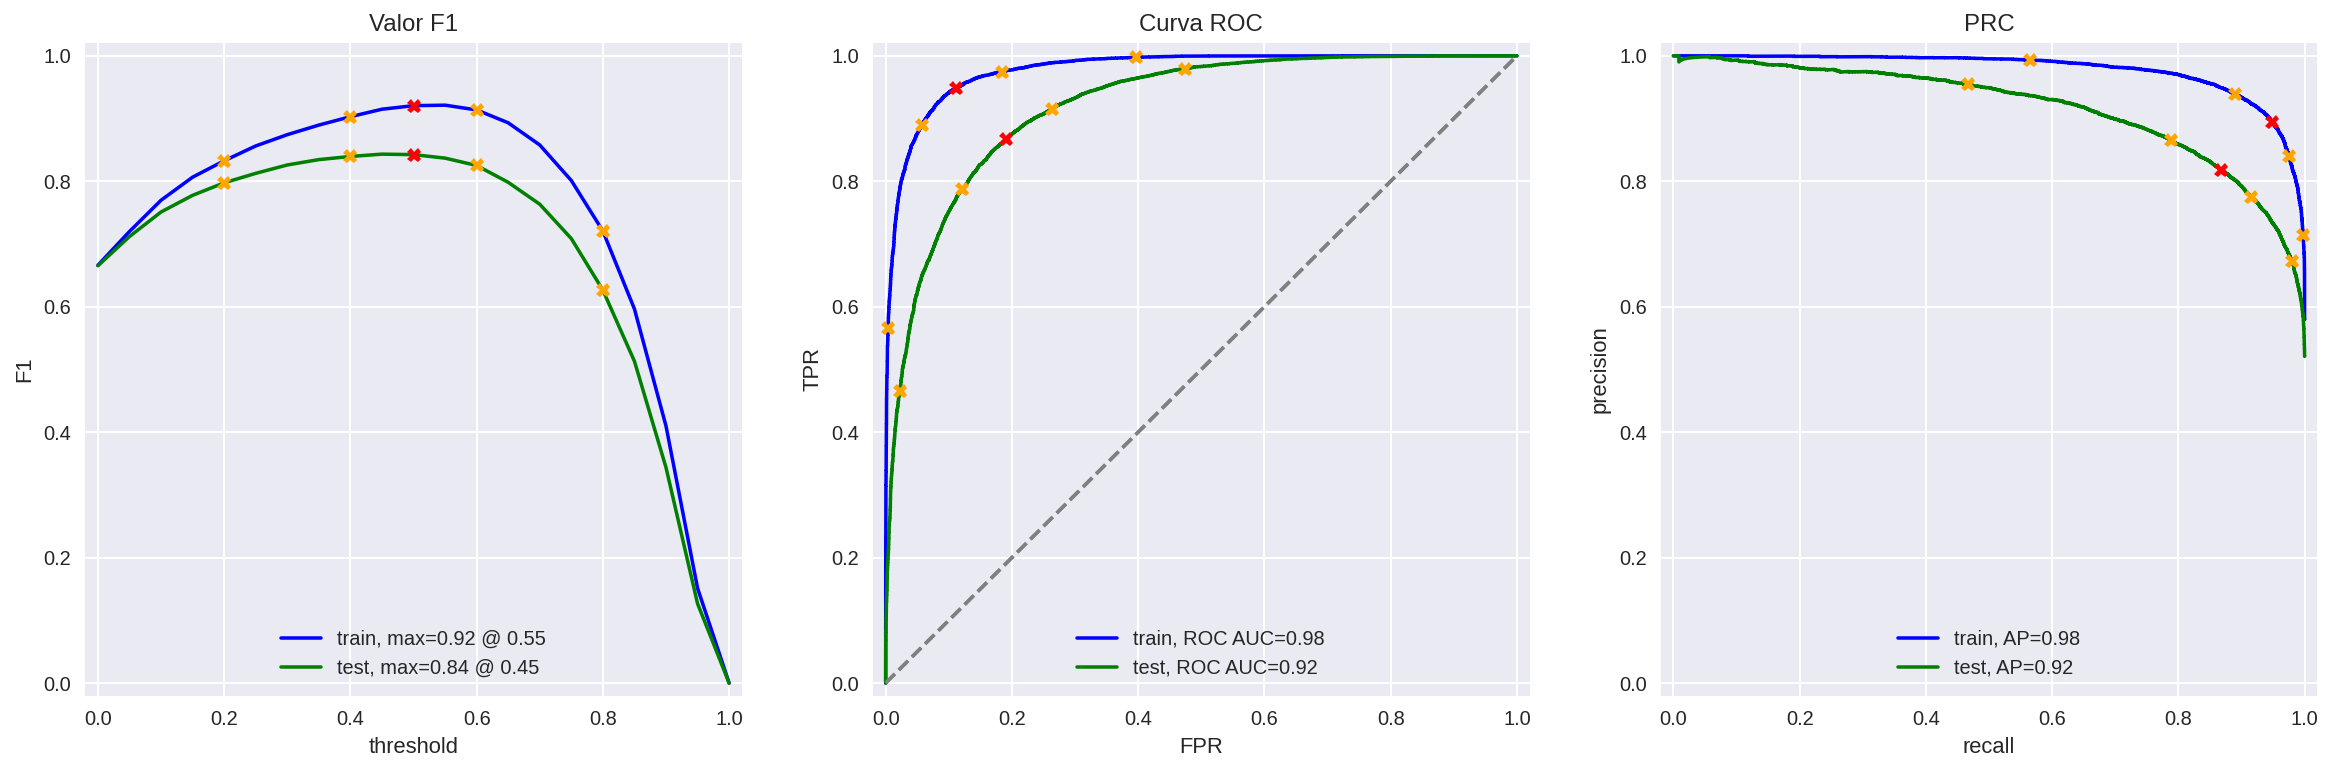

In [61]:
%%time

model_5 = LGBMClassifier(num_leaves=62, learning_rate=0.1, n_estimators=100, max_depth=10)
model_5.fit(train_tf_idf1, train_target)
evaluate_model(model_5, train_tf_idf1, train_target, test_tf_idf1, test_target)

          train  test
Accuracy   0.92  0.84
F1         0.92  0.84
APS        0.98  0.92
ROC AUC    0.98  0.92


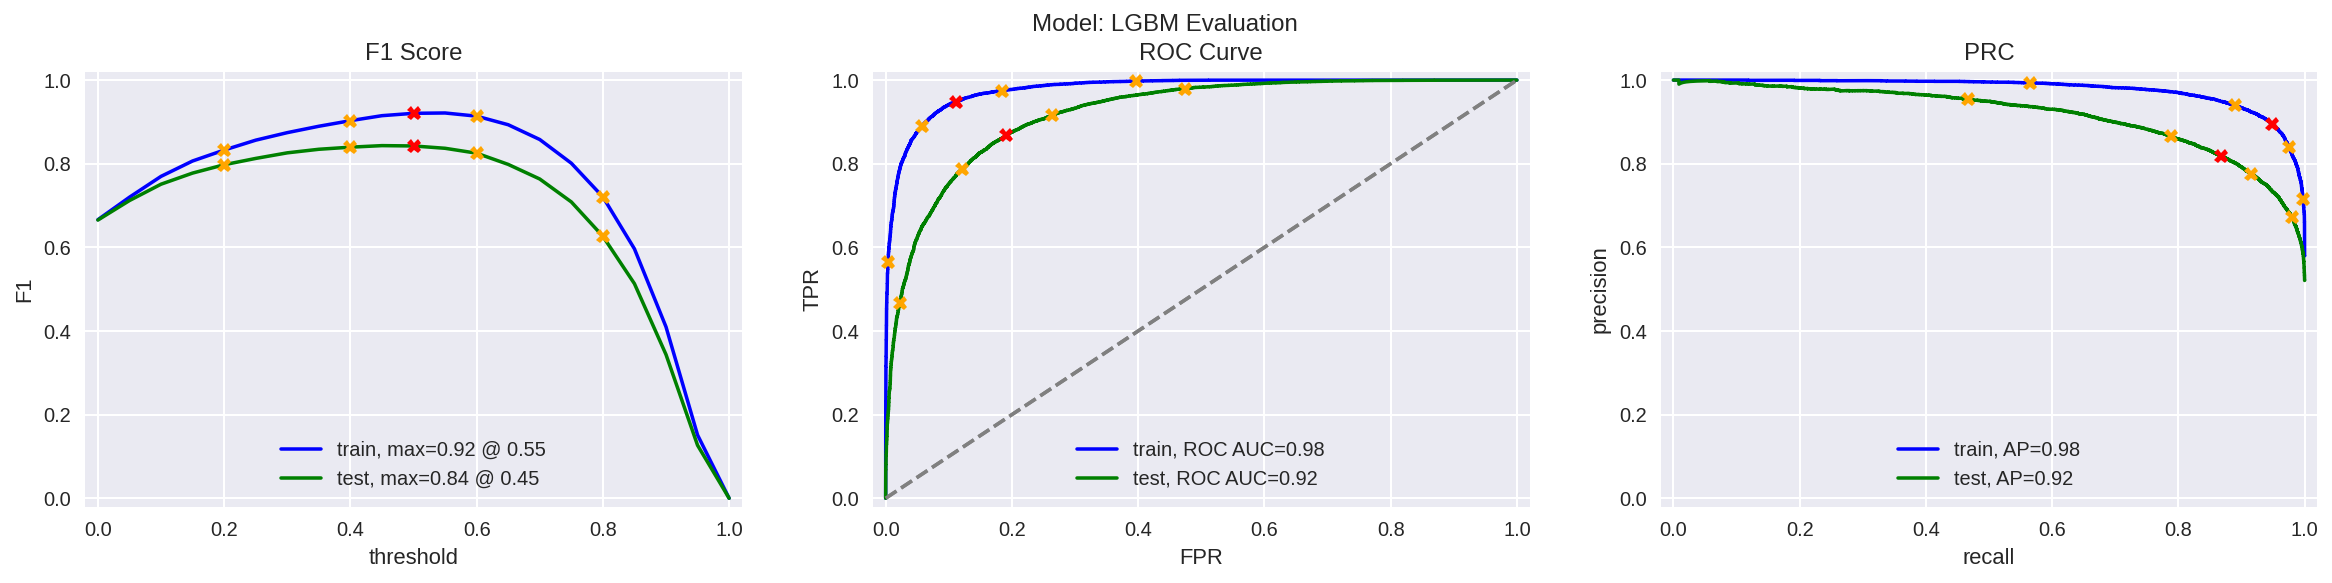

In [62]:
DT_L_train_pred = model_5.predict_proba(train_tf_idf1)[:,1]
DT_L_test_pred = model_5.predict_proba(test_tf_idf1)[:,1]
evaluate_model1(DT_L_train_pred, train_target, DT_L_test_pred, test_target, 'LGBM'  )

### Modelo 6 - spaCy, TF-IDF y LGBMClassifier

          train  test
Accuracy   0.94  0.85
F1         0.94  0.85
APS        0.99  0.92
ROC AUC    0.99  0.93
CPU times: user 59.1 s, sys: 441 ms, total: 59.6 s
Wall time: 1min


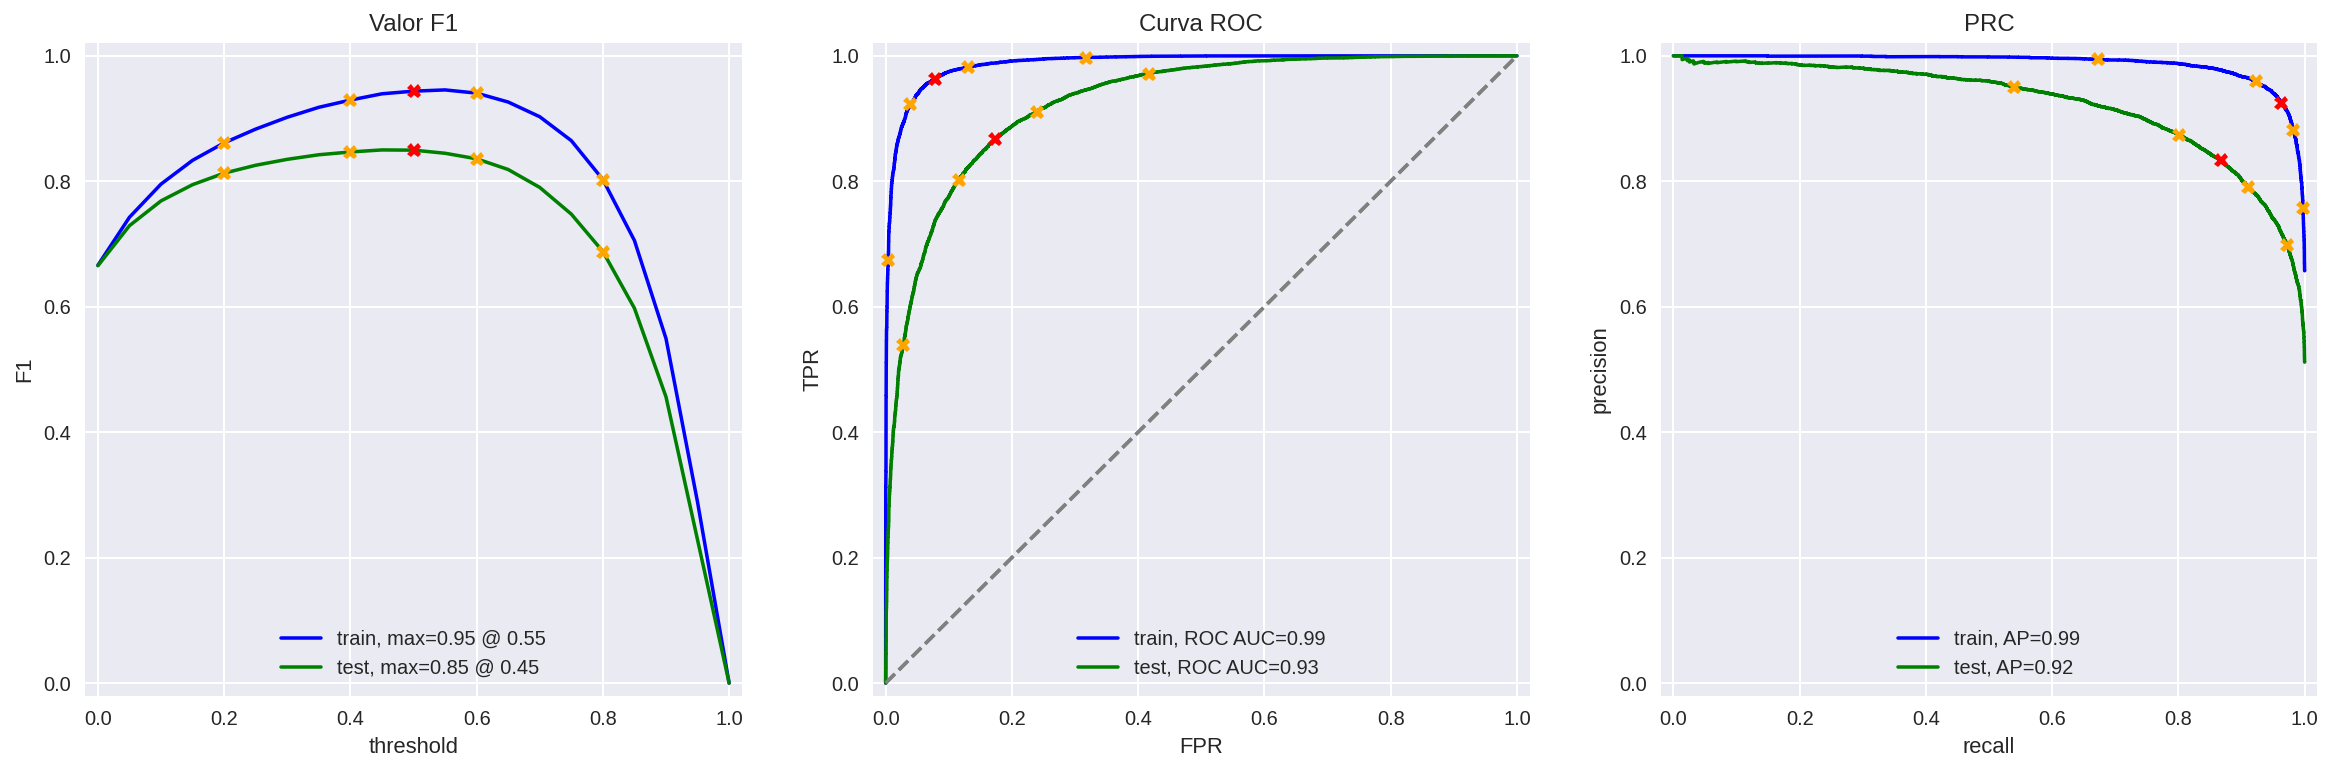

In [63]:
%%time

model_6 = LGBMClassifier(num_leaves=62, learning_rate=0.1, n_estimators=150, max_depth=10)
model_6.fit(train_tf_idf2, train_target)
evaluate_model(model_6, train_tf_idf2, train_target, test_tf_idf2, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Impecable! Ahora si podemos notar un buen rendimiento en los dos procesos, felicitaciones!

### Modelo 7 - spaCy, TF-IDF y Catboost

0:	learn: 0.6641396	total: 2.42s	remaining: 4m
1:	learn: 0.6432988	total: 4.47s	remaining: 3m 38s
2:	learn: 0.6247571	total: 6.5s	remaining: 3m 30s
3:	learn: 0.6087223	total: 8.56s	remaining: 3m 25s
4:	learn: 0.5950856	total: 10.6s	remaining: 3m 21s
5:	learn: 0.5843038	total: 12.6s	remaining: 3m 18s
6:	learn: 0.5757580	total: 14.7s	remaining: 3m 14s
7:	learn: 0.5675204	total: 16.7s	remaining: 3m 11s
8:	learn: 0.5594687	total: 18.7s	remaining: 3m 8s
9:	learn: 0.5524089	total: 20.7s	remaining: 3m 6s
10:	learn: 0.5461015	total: 22.8s	remaining: 3m 4s
11:	learn: 0.5404315	total: 24.8s	remaining: 3m 1s
12:	learn: 0.5354884	total: 26.8s	remaining: 2m 59s
13:	learn: 0.5305811	total: 28.9s	remaining: 2m 57s
14:	learn: 0.5263806	total: 31s	remaining: 2m 55s
15:	learn: 0.5216844	total: 33s	remaining: 2m 53s
16:	learn: 0.5174980	total: 35.1s	remaining: 2m 51s
17:	learn: 0.5140630	total: 37.1s	remaining: 2m 49s
18:	learn: 0.5099865	total: 39.2s	remaining: 2m 46s
19:	learn: 0.5059396	total: 41.1s	r

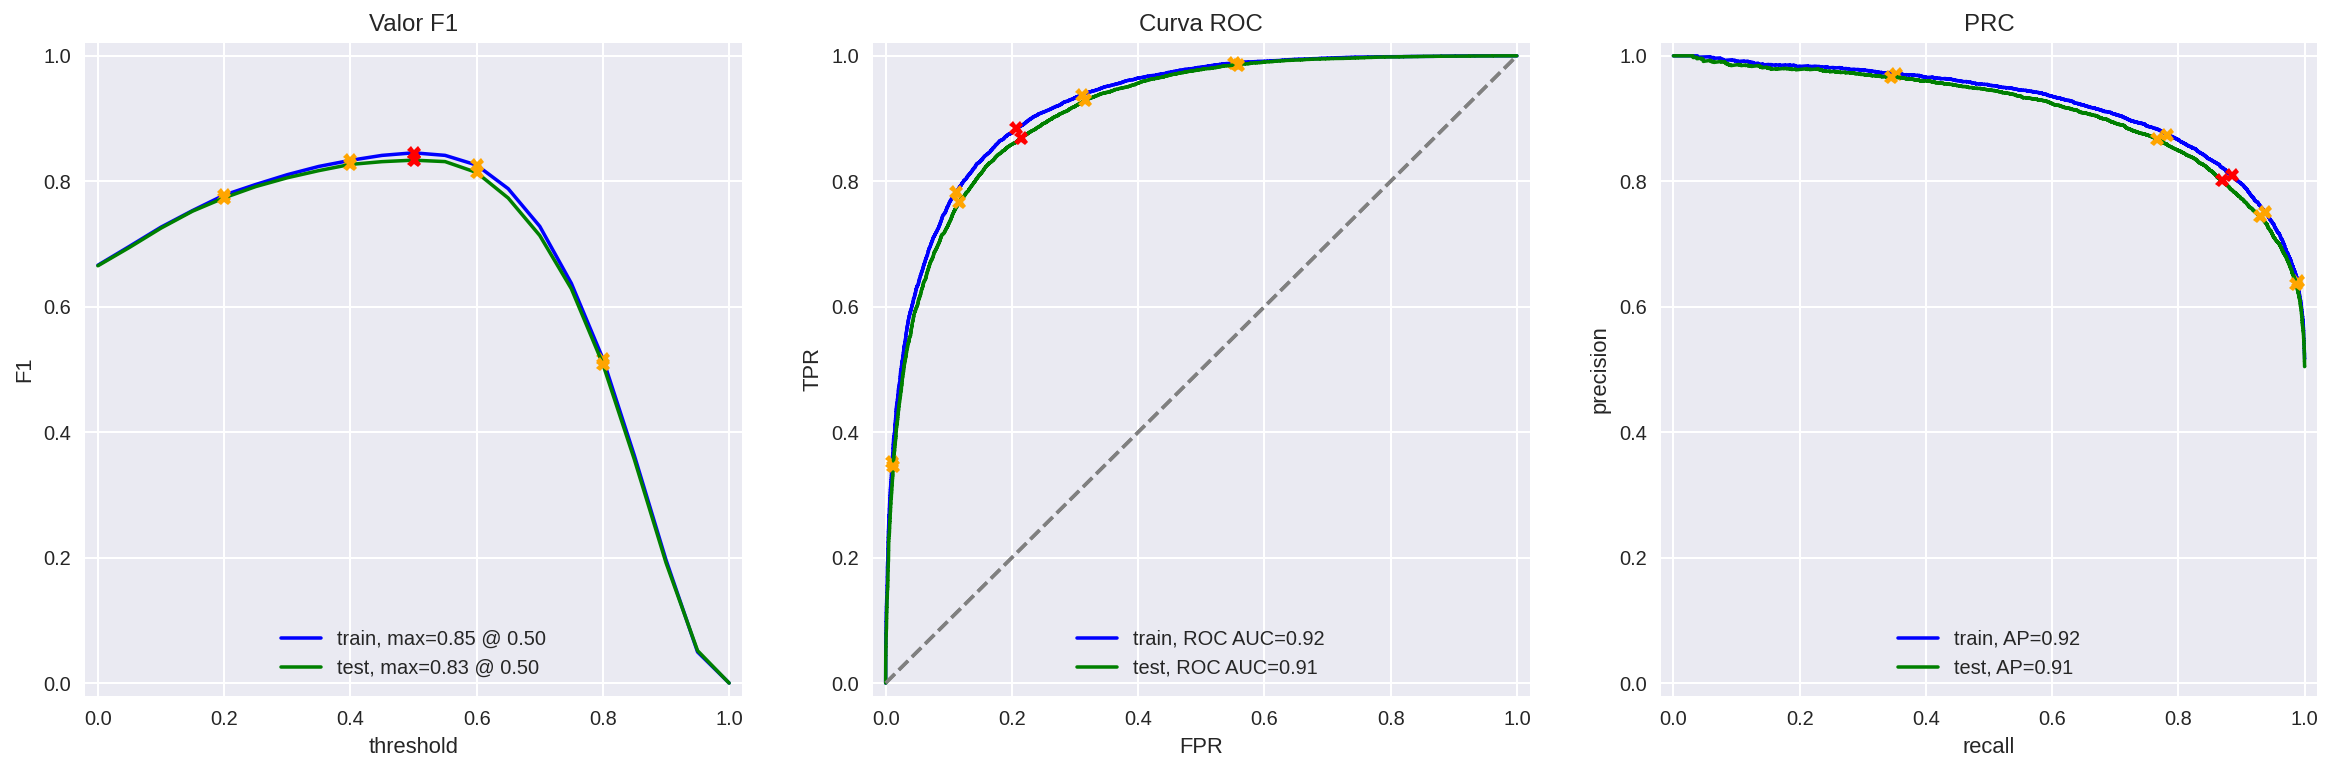

In [64]:
%%time

model_7 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model_7.fit(train_tf_idf2, train_target)
evaluate_model(model_7, train_tf_idf2, train_target, test_tf_idf2, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

En este caso vemos muy buenos resultados aunque no tantos como LGBMClassfier, de todas formas excelente!

### Modelo 8 - spaCy, Bolsa de palabras Random Forest

In [56]:
## Modelo de bolsa de palabras

In [65]:
%%time
count_vect = CountVectorizer(ngram_range=(2,2))
n_gram = count_vect.fit_transform(train_corpus2)
n_gram_test = count_vect.transform(test_corpus2)


CPU times: user 21.3 s, sys: 264 ms, total: 21.5 s
Wall time: 21.6 s


In [66]:
n_gram_train = n_gram.astype(np.float64)
n_gram_test = n_gram_test.astype(np.float64)

In [67]:
model_8 = RandomForestClassifier(random_state = 54321, n_estimators = best_est)
model_8.fit(n_gram_train, train_target)


RandomForestClassifier(n_estimators=13, random_state=54321)

In [68]:
predictions_RF= model_8.predict(n_gram_test)

In [69]:
exactitud = accuracy_score(predictions_RF, test_target)
exactitud

0.7692601878213572

          train  test
Accuracy    1.0  0.77
F1          1.0  0.77
APS         1.0  0.81
ROC AUC     1.0  0.85
CPU times: user 4.44 s, sys: 1.18 ms, total: 4.44 s
Wall time: 5.57 s


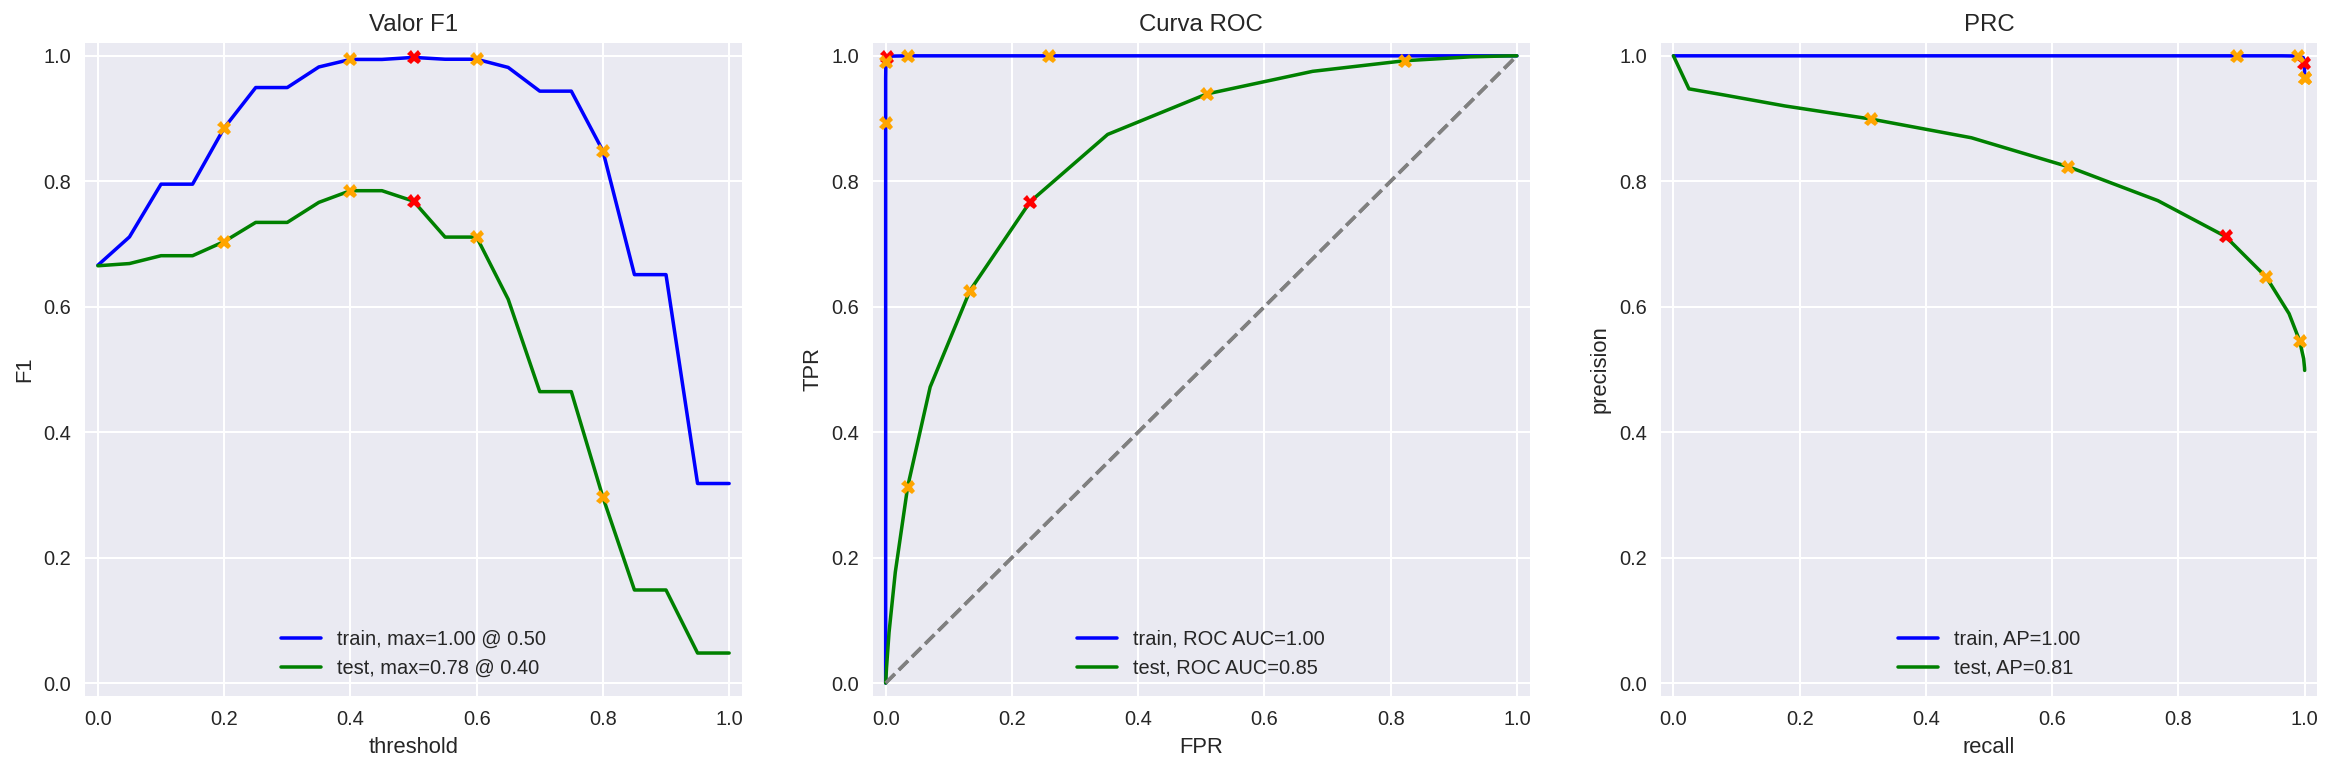

In [92]:
%%time
evaluate_model(model_8, n_gram_train, train_target, n_gram_test, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí hemos probado un proceso diferente, podríamos probar con diferentes valores ngram_range para ver buscar posibles mejoras en el rendimiento. De todas formas la implementación es correcta, felicitaicones!

### Modelo 9 - spaCy, Bolsa de palabras, LGBM

          train  test
Accuracy   0.91  0.83
F1         0.91  0.84
APS        0.97  0.91
ROC AUC    0.97  0.91
CPU times: user 1min 55s, sys: 312 ms, total: 1min 56s
Wall time: 1min 58s


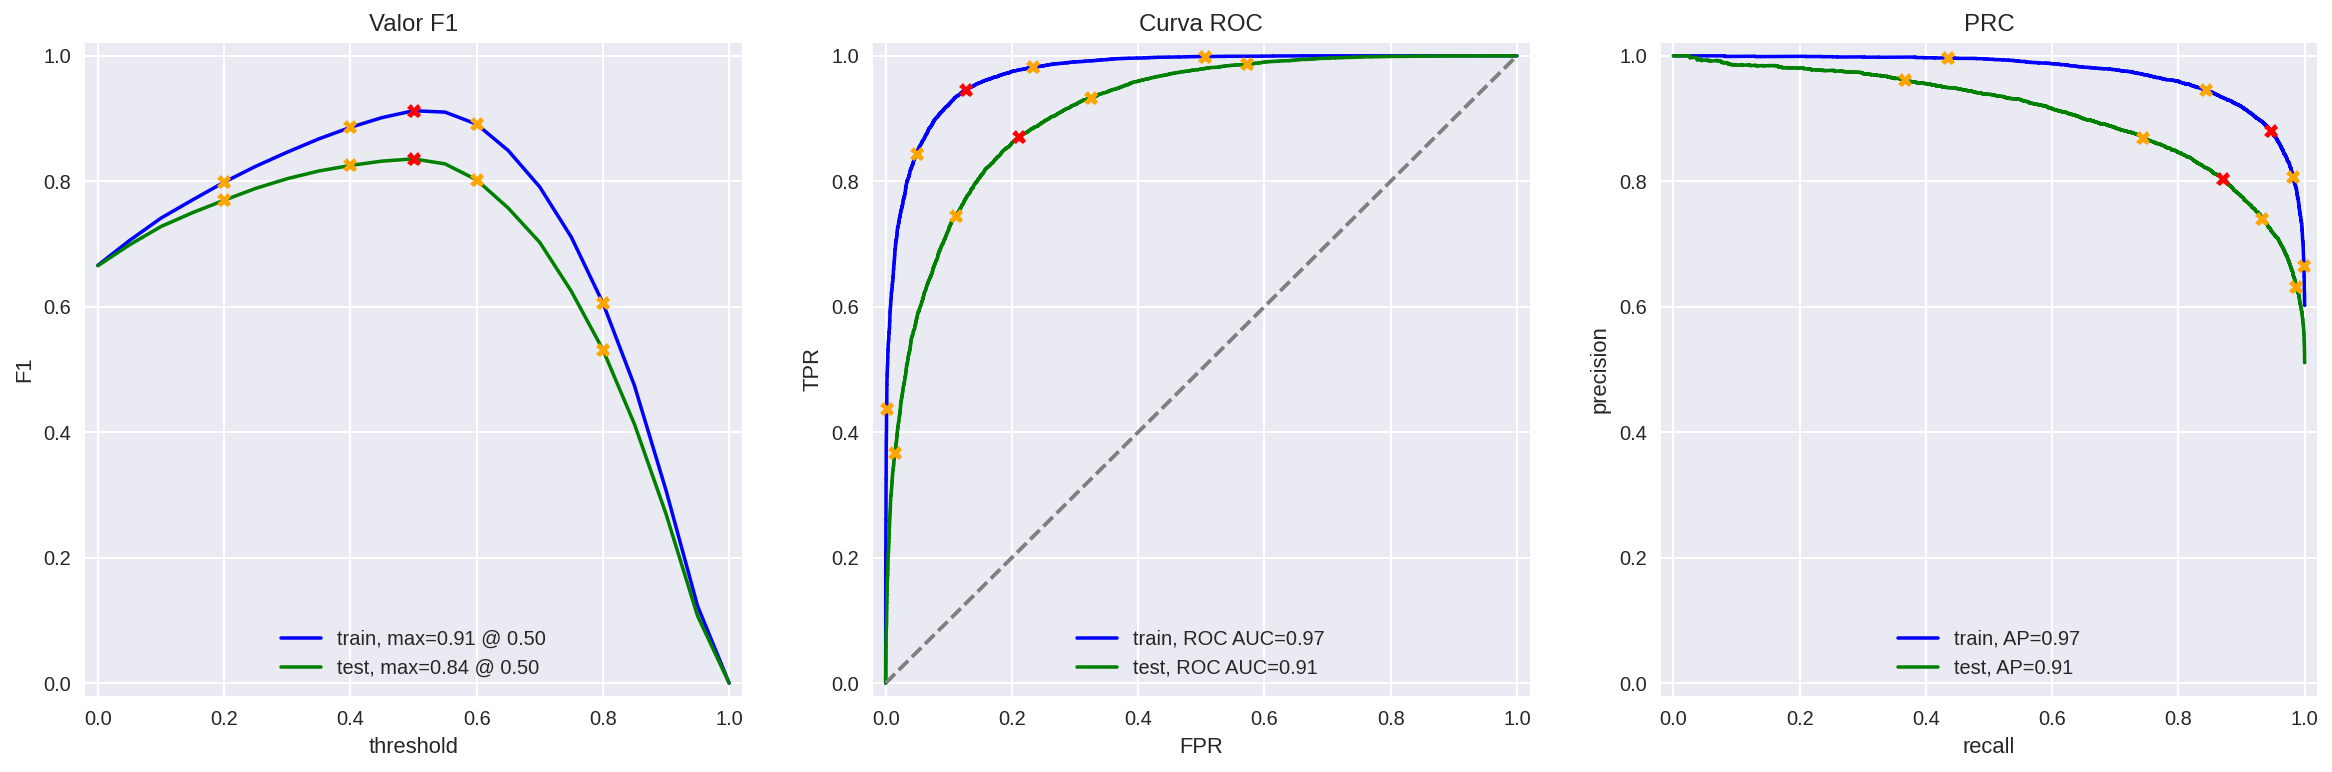

In [95]:
%%time
## Bolsa de palabras con LGBM
model_9 = LGBMClassifier(num_leaves=62, learning_rate=0.1, n_estimators=150, max_depth=10)
model_9.fit(n_gram_train, train_target)
evaluate_model(model_9, n_gram_train, train_target, n_gram_test, test_target)

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí podemos observar nuevamente una mejora en el rendimiento, claramente el modelo LGBM es el más apto para este tipo de problema. Bien hecho!

###  Modelo 10 - BERT

In [49]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
max_sample_size = 300
def BERT_text_to_embeddings1(texts, max_length=512, batch_size=25, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    
    min_tokenized_text_length = 1e7
    max_tokenized_text_length = 0
    
    for text in texts.iloc[:max_sample_size]['review_norm']:
        encoded_text = tokenizer.encode(text.lower(), add_special_tokens = True, truncation=True,
                                        max_length=512)
        
        padded = np.array(encoded_text + [0]*(max_length-len(encoded_text)))
        attention_mask = np.where(padded != 0, 1, 0)
        
        ids_list.append(padded)
        
        attention_mask_list.append(attention_mask)
        
        min_tokenized_text_length = min(min_tokenized_text_length, len(encoded_text))
        max_tokenized_text_length = max(max_tokenized_text_length, len(encoded_text))
        
    
    
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(len(ids_list)//batch_size), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [47]:

df_reviews_train_BERT = df_reviews_train.loc[:,['review_norm','pos']].head(5000)
df_reviews_train_BERT

,review_norm,pos
0,the pakage imply that warren beatty and goldie...,0
1,how the hell do they get this make present its...,0
7,this true story of carlson 's raider be more o...,0
8,should have be title ' balderdash ' little in ...,0
9,the movie ' gung ho ' the story of carlson 's ...,0
...,...,...
10071,what an awful movie I love monster flick but I...,0
10072,this be just a joke of a movie they lose I alr...,0
10073,this be a low budget roger corman horror creat...,0
10074,this be the first non zombie subgenre review I...,0


In [48]:

df_reviews_test_BERT = df_reviews_test.loc[:,['review_norm','pos']].head(5000)
df_reviews_test_BERT

,review_norm,pos
2,there be no real story the film seem more like...,0
3,um a serious film about troubled teen in singa...,1
4,I be totally agree with garryjohal from singap...,1
5,this be the first movie I 've see from singapo...,1
6,yes non singaporean 's can not see what be the...,1
...,...,...
9818,this movie be absurd absolutely terrible micha...,0
9819,I have not see ishtar but I do have the misfor...,0
9820,this movie desperate measure be I be not quite...,0
9821,I can not believe I watch this whole movie ano...,0


In [50]:
train_target_BERT = df_reviews_train['pos'].head(200)
test_target_BERT = df_reviews_test['pos'].head(200)

In [1]:
# Las siguientes secciones de codigo se comentarán para evitar obtener nuevamente los insertados, los
# Ya estan guardados
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas

# SOLO EJECUTAR PARA OBTENER LOS DATOS
train_features_9 = BERT_text_to_embeddings1(df_reviews_train_BERT, force_device=None)

#Para probar con una muestra de 100
#max_sample_size = 100
test_features_9 = BERT_text_to_embeddings1(df_reviews_test_BERT, force_device=None)


NameError: name 'BERT_text_to_embeddings1' is not defined

In [ ]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)


In [76]:

# y cargar...
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

In [77]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target_BERT.shape)
print(test_features_9.shape)
print(test_target_BERT.shape)


(23796,)
(200, 768)
(200,)
(200, 768)
(200,)


Vamos a utilizar el mejor modelo de entrenamiento que fue LGBM

          train  test
Accuracy    1.0  0.64
F1          1.0  0.56
APS         1.0  0.80
ROC AUC     1.0  0.80
CPU times: user 1.89 s, sys: 3.99 ms, total: 1.89 s
Wall time: 2.61 s


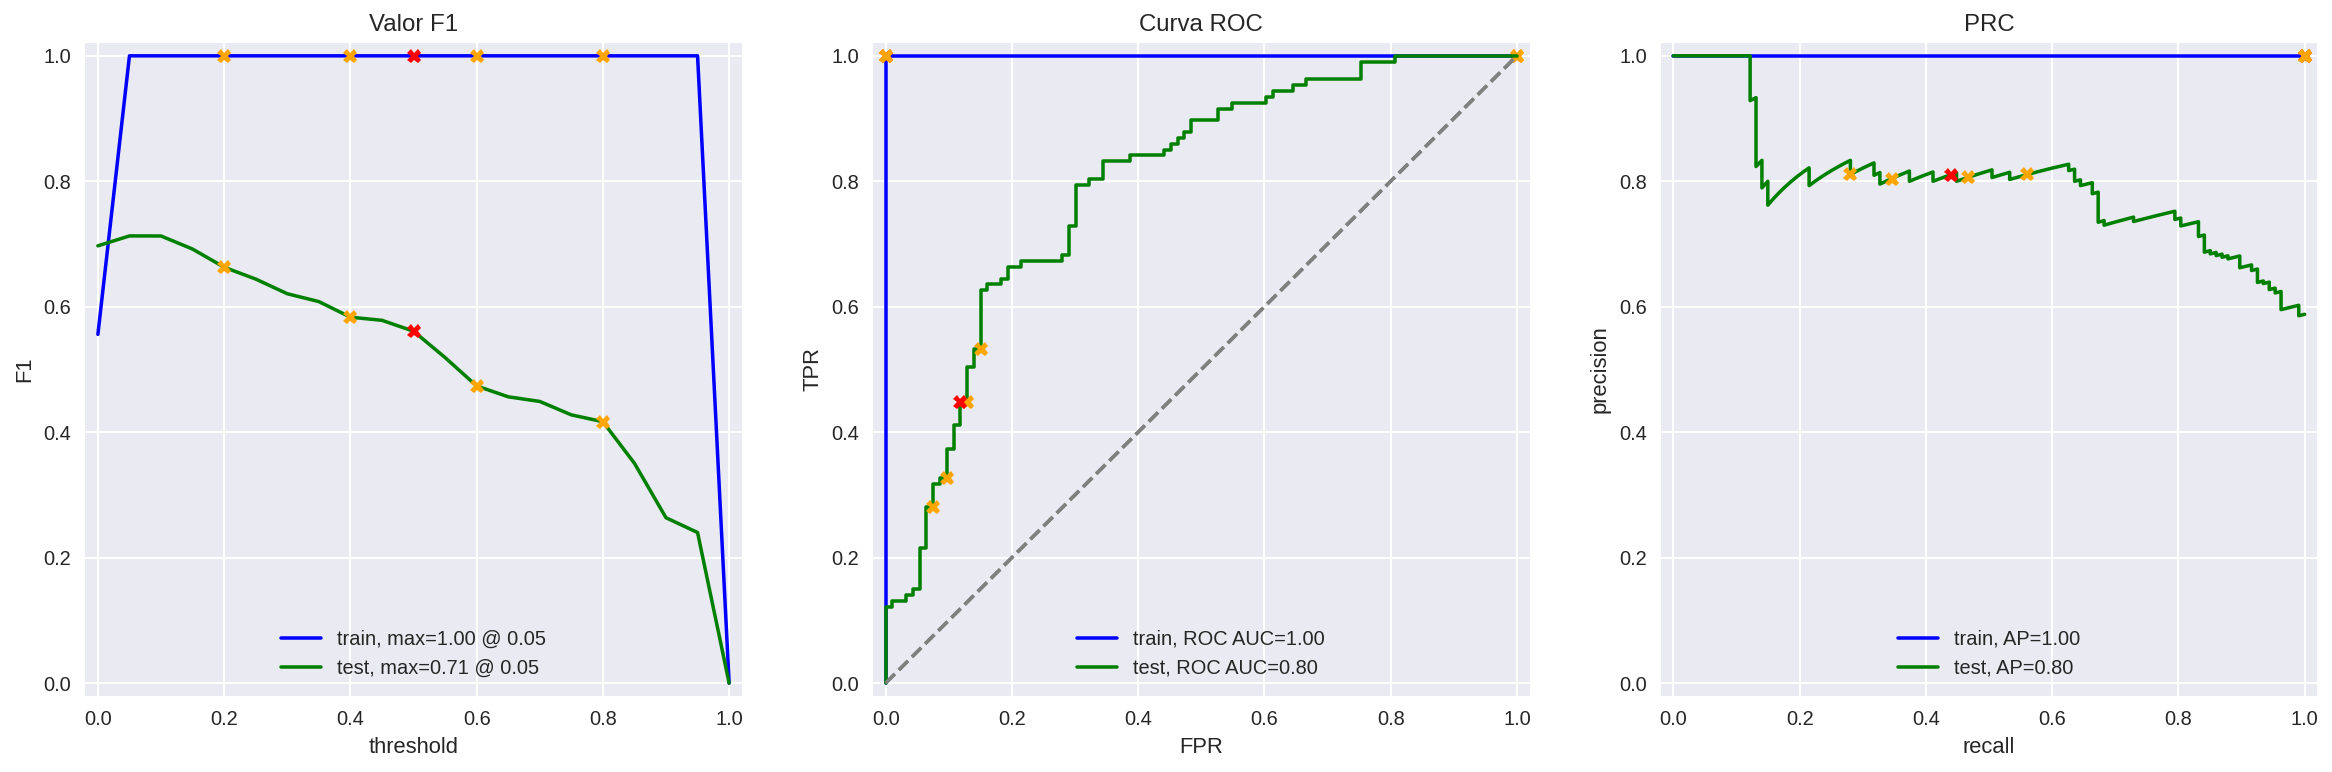

In [94]:
%%time
model_10 = LGBMClassifier(num_leaves=62, learning_rate=0.1, n_estimators=150, max_depth=10)
model_10.fit(train_features_9, train_target_BERT)
evaluate_model(model_10, train_features_9, train_target_BERT, test_features_9, test_target_BERT)

Se ha logrado entrenar un modelo con BERT, sin embargo, esta forma de entrenar modelos de prediccion requiere del uso de tarjetas gráficas las cuales mejoren el tiempo de procesamiento. Para este caso no se logró utilizar la tarjeta gráfica y mediante el uso de CPU solo se pudo entrenar con una pequeña cantidad de datos. Se va a intentar nuevamente con todos los datos de entrenamiento cuando se logr utilizar el GPU para correr el código.

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Felicitaciones por decidir implementar BERT, el proceso que realizaste es correcto y cumpliste con todos los puntos importantes de esta implementación. Tal vez para mejorarlo podríamos balancear un poco la cantidad de datos que utilizamos para el entrenamiento en comparación a los de test, entrenar con tantos y testear con pocos nos llevo a un sobre ajuste.

<div class="alert alert-block alert-info">
<b>Deseaba utilizar una mayor cantidad de datos, pero lamentablemente no pude utilizar mi GPU y correr con el CPU hacía que el kernel se colgara a cada rato. Una vez logre utilizar mi GPU volveré a entrenar con todo el dataset .</b> <a class="tocSkip"></a>
</div>

## Mis reseñas probadas con diferentes modelos

A continuación se procederá a probar reseñas escritas con los modelos entrenados para analizar que tan efectiva es la predicción:

In [79]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.',
    'The movie is very good, I feel like it has the exact amount of drama and suspense that keeps you on the edge of your seat.',
    "It starts a little slow, and at first it's boring, but after half the movie, everything starts to make sense, I think in the end it's a movie that I would recommend.",
    "I cannot recommend this movie, even though it starts very intensely, it becomes very boring from the middle of the movie, with a very bad ending.",
    "Good movie, 10/10",
    "it was a bad movie, but i enjoyed it",
    "the acting was so bad, It was painful to see"
    
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].progress_apply(procesar_texto)

my_reviews

  0%|          | 0/14 [00:00<?, ?it/s]

,review,review_norm
0,"I did not simply like it, not my kind of movie.",I do not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well I be bored and feel asleep in the middle ...
2,I was really fascinated with the movie,I be really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actor look really old and disinterest...
4,I didn't expect the reboot to be so good! Writ...,I do not expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie have its upside and downside but I f...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launch on netflix be a brave move I really app...
8,"The movie is very good, I feel like it has the...",the movie be very good I feel like it have the...
9,"It starts a little slow, and at first it's bor...",it start a little slow and at first it be bori...


In [80]:
## Funcion para probar los modelos
def my_reviews_test(model, tfdf, texts):
    reviews_pred = model.predict_proba(tfdf.transform(texts).astype(np.float64))[:, 1]
    for i, review in enumerate(texts.str.slice(0, 100)):
        print(f'{reviews_pred[i]:.2f}:  {review}')

### Modelo 1

In [81]:
texts = my_reviews['review_norm']

In [82]:
pred_model1 = my_reviews_test(model_1, tf_idf1, texts)
pred_model1

1.00:  I do not simply like it not my kind of movie
0.00:  well I be bored and feel asleep in the middle of the movie
1.00:  I be really fascinated with the movie
1.00:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
1.00:  I do not expect the reboot to be so good writer really care about the source material
1.00:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.00:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
1.00:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
1.00:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.00:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.00:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 2

In [83]:
pred_model2 = my_reviews_test(model_2, tf_idf2, texts)
pred_model2

1.00:  I do not simply like it not my kind of movie
0.00:  well I be bored and feel asleep in the middle of the movie
1.00:  I be really fascinated with the movie
1.00:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
1.00:  I do not expect the reboot to be so good writer really care about the source material
0.00:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
1.00:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
1.00:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
1.00:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.00:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.00:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 3

In [84]:
pred_model3 = my_reviews_test(model_3, tf_idf1, texts)
pred_model3

0.85:  I do not simply like it not my kind of movie
0.46:  well I be bored and feel asleep in the middle of the movie
0.92:  I be really fascinated with the movie
0.77:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.69:  I do not expect the reboot to be so good writer really care about the source material
0.62:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.38:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.77:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.92:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.54:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.38:  I can not recommend this movie even though it start very intensely it become very boring 

In [85]:
prueba = model_3.predict(tf_idf1.transform(texts))
prueba

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

### Modelo 4

In [86]:
pred_model4 = my_reviews_test(model_4, tf_idf2, texts)
pred_model4

0.69:  I do not simply like it not my kind of movie
0.54:  well I be bored and feel asleep in the middle of the movie
0.69:  I be really fascinated with the movie
0.54:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.38:  I do not expect the reboot to be so good writer really care about the source material
0.62:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.38:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.92:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.92:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.23:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.15:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 5

In [87]:
pred_model5 = my_reviews_test(model_5, tf_idf1, texts)
pred_model5

0.62:  I do not simply like it not my kind of movie
0.45:  well I be bored and feel asleep in the middle of the movie
0.62:  I be really fascinated with the movie
0.62:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.64:  I do not expect the reboot to be so good writer really care about the source material
0.62:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.30:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.63:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.64:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.25:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.14:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 6


In [88]:
pred_model6 = my_reviews_test(model_6, tf_idf2, texts)
pred_model6

0.61:  I do not simply like it not my kind of movie
0.35:  well I be bored and feel asleep in the middle of the movie
0.62:  I be really fascinated with the movie
0.51:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.70:  I do not expect the reboot to be so good writer really care about the source material
0.63:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.37:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.76:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.80:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.22:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.06:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 7

In [89]:
pred_model7 = my_reviews_test(model_7, tf_idf2, texts)
pred_model7

0.59:  I do not simply like it not my kind of movie
0.56:  well I be bored and feel asleep in the middle of the movie
0.59:  I be really fascinated with the movie
0.56:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.66:  I do not expect the reboot to be so good writer really care about the source material
0.59:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.44:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.67:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.69:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.40:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.12:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 8

In [90]:
pred_model8 = my_reviews_test(model_8, count_vect, texts)
pred_model8

0.85:  I do not simply like it not my kind of movie
0.77:  well I be bored and feel asleep in the middle of the movie
0.92:  I be really fascinated with the movie
0.62:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.69:  I do not expect the reboot to be so good writer really care about the source material
0.69:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.77:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.92:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.92:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.54:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.38:  I can not recommend this movie even though it start very intensely it become very boring 

### Modelo 9

In [91]:
pred_model9 = my_reviews_test(model_9, count_vect, texts)
pred_model9

0.55:  I do not simply like it not my kind of movie
0.60:  well I be bored and feel asleep in the middle of the movie
0.60:  I be really fascinated with the movie
0.57:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.52:  I do not expect the reboot to be so good writer really care about the source material
0.68:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.23:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.60:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.77:  the movie be very good I feel like it have the exact amount of drama and suspense that keep you on t
0.55:  it start a little slow and at first it be boring but after half the movie everything start to make s
0.23:  I can not recommend this movie even though it start very intensely it become very boring 

**Observaciones sobre los datos**
- Se observa que las probabilidades que que se obtuvieron para cada uno de los modelos, en algunos casos difieren en gran manera. Algunos tienen dificultades para diferenciar una mala reseña cuando se encuentra una palabra positiva dentro de una reseña negativa, como " I do not simply like", por lo que se podría decir que los modelos a veces tienen baja exactitud con reseñas ambiguas

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelentes pruebas sobre tus reseñas Leandro, lo has hecho muy bien! Felicitaciones!

## Conclusiones

A continuación se muestra una tabla resumen donde se indican los resultados obtenidos con los diferentes modelos de predicción:

| Modelo  | Normalizado  | Tiempo de procesamiento | Exactitud | F1 | ROC |
|---|------------|------------|------------|------------|------------|
| **Constante** | No | 472ms | 0.5 | 0.5 | 0.5 |
| **Arbol de decisión** | No | 668ms | 0.71 | 0.71 | 0.71 |
|  | Si | 668ms | 0.71 | 0.71 | 0.71 |
| **Random Forest** | No | 1min 20s | 0.78 | 0.78 | 0.86 |
|  | Si | 9.48 s | 0.78 | 0.78 | 0.86 |
| **LGBM Classifier** | No | 56.9 s | 0.84 | 0.84 | 0.92 |
|  | Si | 1min | 0.85 | 0.85 | 0.93 | 
| **Catboost** | No | 3min 31s | 0.83 | 0.83 | 0.91 |
| **Bolsa de palabras, Random Forest** | Si | 5.57s | 0.77 | 0.77 | 0.85 |
| **Bolsa de palabras, LGMB** | Si | 1m 58s | 0.83 | 0.84 | 0.91 |\
| **Modelo BERT** | - | 2.61s | 0.64 | 0.56 | 0.80 | 


Despues de realizar todas las tareas establecidas y obtener los resultados se ha llegado a las siguientes conclusiones:
- Para la etapa de carga de datos no se encontro mayores problemas. Se tuvieron filas de datos que presentaban valores ausentes, pero dado que eran pocos valores se optó por eliminarlos.
- Para las necesidades del proyecto planteado no se requería de todas las características que entregaba la base de datos, solo era necesario la infdormación sobre las reseñas, por lo que no se tomó en cuenta la información adicional.
- En un análisis inicial de la iniformación, mediante gráficas se observó la cantidad de reseñas que existen de las películas ordenadas por años y se observa que en los años iniciales de la creación de las películas no existían muchas críticas.
- Se observó también que pocas películas reciben grandes cantidades de reseñas, esto podrías ser debido a que existen peliculas que no muchas películas alcanzan niveles altos de popularidad, por lo que la cantidad de reseñas que reciben es mínima.
- Se realizó un análisis del desiqulibrio de clases, en caso de que se tengan mayor cantidad de reseñas positivas y negativas, lo cual podría ser un factor influyente al momento de realizar las predicciones, sin embargo, se detectó que existe casi la misma cantidad de reseñas positivas que negativas, por lo que este factor no va a infuir.
- Se revisó tambien como se encuentran distribuidos las calificaciones de las películas y se tiene que se encuentran relativamente equilibradas las calificaciones, siendo que no hay una calificacion mucho mas prominente que otra, sin embargo, no existen calificaciones de 5 o 6, por lo que esto podría significar un error al momento de obtener los datos o que probablemente se eliminaron estas calificaciones de la base de de datos.
- Para el análisis de las reseñas se optó por dos acercamientos, con las reseñas normalizadas y lematizadas y sin normalizar.
- Utilizando un clasifficador dummy se obtuvo un 50% de eficacia,  dado que la mitad de los datos tienen reseñas positivas y la otra mitad reseñas negativas, por lo que este resultado es muy coherente y es un punto de partida para analizar la información de los otros modelos.
- Con el modelo de arbol de decisión no se obtuvo mucha diferencia entre los datos que estaban normalizados y los que no. Se obtuvo una exactitud máxima de 0.71
- Utilizando el modelo de Random Forest tampoco exisitió diferencia entre reseñas normaliizadas y las que no lo estaban, logrando una exactitud máxima de 0.78, mejorando un poco lo logrado con el arbol de decisión.
- Se probó también con el modelo LGBM y se observa que no existe mucha diferencia entre las reseñas normalizadas y las que no lo están. Se obtuvo valores de exactitud mucho mejores que con los dos métodos anteriores, logrando un valor máximo de 0.85 con las reseñas normalizadas
- Se realizó tambien una prueba con Catboost con las reseñas normalizadas y se logró una exactitud máxima de 0.83.
- Utilizando n-gramas(2,2) se creo las características dando una matriz de tamaños bastante más grandes que los creados con la vectorización. Se utilizó Random Forest y LGBM para el entrenamiento  de modelos con estas características y se obtuvieron exactitudes de 0.77 y 0.83 respectivamente.
- Se intentó utilizar el GPU para el anális con el método BERT, sin embargo no se logró el uso de este componente, por lo que se utilizó el CPU y se tomo una muestra de 200 datos para realizar una prueba de prediccion, con la que se logró una exactitud de 0.64, siendo un poco mejor que el modelo dummy, pero que sin embargo si se utiliza todo el conjunto de datos para el entrenamiento mejore considerablemente.
- Los modelos sufren para predecir reseñas que tienen cierto grado de ambiguedad, sin embargo, de forma general las reseñas no suelen ser ambiguas por lo que el grado de exactitud logrado puede ser considerado muy bueno

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Quiero agradecerte Leandro porque tu trabajo ha estado muy bien realizado a lo largo de todo el proceso, a su vez se puede notar tu comprensión del trabajo ya que está reflejado en tus conclusiones. Bien hecho!

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 